In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
import collections
from array import array

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'+'xsec_detsys_WireModX_extra/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')


Welcome to JupyROOT 6.18/04


In [2]:
#!jupyter nbconvert --to script numuCCana_muon_cut_weight.ipynb

In [3]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# Detector systematic: WireModX

In [4]:
# Load input files
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
    
outputdir_png, outputdir_root, outputdir_pdf = NuCC.prepareOutput2(outputdir)
RootFile = ROOT.TFile(output_filedir+"xsec_detsys_WireModX.root","RECREATE");

#filename_overlay = 'NuCCana_overlay_V26_weight.root'
filename_overlay = 'detector_variation_reweight/3b_extra/NuCCana_detsys_CV_3b_extra.root'
filename_data = 'NuCCana_data_V25.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'

#additional detector variation file
filename_detsys = 'detector_variation_reweight/3b_extra/NuCCana_detsys_WireModX_3b_extra.root'

tree_name = 'numuCCAna'

In [5]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =     7.644e+18 # 8.649e+18  # best with tor875
data_trigger = 1838700.0 #2220362.0  #E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''

#filename_detsys = filename_detsys+'out33.root'
detsys = ROOT.TChain(tree_name+ "/event","event")
detsys.Add( inputdir + filename_detsys)
pot_detsys = NuCC.getPOT(inputdir,filename_detsys,tree_name)

pot_overlay = pot_overlay
sample = [data,ext,overlay,dirt,detsys]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0,detsys:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt',detsys:'detsys'}
scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
scale_detsys = pot_data/pot_detsys
scale[detsys] = scale_detsys
print 'Detsys POT:', pot_detsys, ' Scale: ', scale_detsys
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	507477
Data: Number of Entries:	28005
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		7.644e+18
Ext:		0
Overlay:	6.28532742105e+20
Dirt:		1.26535223192e+20

Detsys POT: 6.26500083195e+20  Scale:  0.0122011156982
Scalefactors: 
Data:		1.0
Ext:		0.0967862715198
Overlay:	0.0121616576002
Dirt:		0.0604100566402


In [6]:
if 1:
    filename_overlay = filename_overlay+'out4.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'
    
    filename_detsys = filename_detsys+'out4.root'
    detsys_out = ROOT.TChain(tree_name,"t_out")
    detsys_out.Add( inputdir + filename_detsys)
    print "Detsys: Number of Entries:\t", detsys_out.GetEntries()

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out, detsys_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0, detsys_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt',detsys_out:'detsys'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]
    scale_out[detsys_out] = scale_detsys

Detsys: Number of Entries:	505841
Overlay: Number of Entries:	507476
Data: Number of Entries:	28004
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40800



In [7]:
##### flux and number of tragets parameters###
#flux = 1.16859e11/1.592e20 # flux per POT per cm2
flux = 7.3789785277e-10
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

Fiducial Volume:  49184671.35
Beam flux = 5.64049e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [8]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')


energy_cut = ' && MCle_Energy>0.15'

numu_signal = numu_signal+energy_cut
numu_true = numu_true+energy_cut
numu_nomu = numu_nomu+energy_cut
numu_lowpur = numu_lowpur+energy_cut
numu_nc = numu_nc+energy_cut
numu_ov = numu_ov+energy_cut
numu_other = numu_other+energy_cut
    
num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [9]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [10]:
track_start_border_x = '(TrackStart_x_sce <(-1.55+5) || TrackStart_x_sce > (254.8-5))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+5) || TrackEnd_x_sce > (254.8-5))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+5) || TrackStart_y_sce > (117.47-5))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+5) || TrackEnd_y_sce > (117.47-5))'
track_start_border_z = '(TrackStart_z_sce <(0.1+5) || TrackStart_z_sce > (1036.9-5))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+5) || TrackEnd_z_sce > (1039.9-5))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-4)<0.9 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-4)<0.9 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.95)<0.9 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-3.95)<0.9 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

detsys_out.SetAlias("track_end_uncontained",track_end_uncontained)
detsys.SetAlias("track_end_uncontained",track_end_uncontained)
detsys.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
detsys_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
detsys.SetAlias("crt_tom_cut",crt_tom_cut)
detsys_out.SetAlias("crt_tom_cut",crt_tom_cut)


weight_name = 'EventWeight*TunedCentralValue_Genie'


In [11]:
# Load the global variables for access of functions
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root, outputdir_pdf)
#NuCC.printGlobal()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [12]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

In [13]:
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/25.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/20.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [14]:
print numu_signal

fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5 && MCle_Energy>0.15


In [15]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
print 'Passing events after: '
nocut_ = detsys_out.GetEntries()
pre_ = detsys_out.GetEntries('muon')
fidvol_ = detsys_out.GetEntries('muon && fidVol')
crt_ = detsys_out.GetEntries('muon && fidVol && crt_tom_cut')
trackscore_ = detsys_out.GetEntries('muon && fidVol && crt_tom_cut && TrackScore>0.8')
tracklength_ = detsys_out.GetEntries('muon && fidVol && crt_tom_cut && TrackScore>0.8 && TrackLength>20')
trackPID_ = detsys_out.GetEntries('muon && fidVol && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78')
NuScore_ = detsys_out.GetEntries('muon && fidVol && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1')


print 'No cut: ',nocut_
print 'Preselection: ',pre_
print '... + fidVol: ',fidvol_
print '... + crt_tom_cut: ',crt_
print '... + TrackScore: ',trackscore_
print '... + TrackLength: ',tracklength_
print '... + TrackPID_chiproton: ',trackPID_
print '... + NuScore: ',NuScore_

print nocut_,' & ',pre_,' & ',fidvol_,' & ',crt_,' & ',trackscore_,' & ',tracklength_,' & ',trackPID_,' & ',NuScore_

print '%.0f'%(nocut_*scale_out[detsys_out]),' & ','%.0f'%(pre_*scale_out[detsys_out]),' & ','%.0f'%(fidvol_*scale_out[detsys_out]),' & ','%.0f'%(crt_*scale_out[detsys_out]),' & ','%.0f'%(trackscore_*scale_out[detsys_out]),' & ','%.0f'%(tracklength_*scale_out[detsys_out]),' & ','%.0f'%(trackPID_*scale_out[detsys_out]),' & ','%.0f'%(NuScore_*scale_out[detsys_out])

cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'


Passing events after: 
No cut:  505841
Preselection:  212376
... + fidVol:  142384
... + crt_tom_cut:  122912
... + TrackScore:  114117
... + TrackLength:  104072
... + TrackPID_chiproton:  97692
... + NuScore:  82829
505841  &  212376  &  142384  &  122912  &  114117  &  104072  &  97692  &  82829
6172  &  2591  &  1737  &  1500  &  1392  &  1270  &  1192  &  1011


In [16]:
# calculate total flux integrated cross section:

N_data = data_out.GetEntries(cut)
N_ext  = ext_out.GetEntries(cut)*scale_out[ext_out]
N_dirt = dirt_out.GetEntries(cut)*scale_out[dirt_out]
N_overlay = overlay_out.GetEntries(cut+'&& !numu_signal')*scale_out[overlay_out]
N_signal = overlay_out.GetEntries(cut+' && numu_signal')*scale_out[overlay_out]
N_true = overlay_out.GetEntries(numu_true)*scale_out[overlay_out]
#print N_dirt, N_overlay
N_overlay_detsys = detsys_out.GetEntries(cut+'&& !numu_signal')*scale_out[detsys_out]
N_signal_detsys = detsys_out.GetEntries(cut+'&& numu_signal')*scale_out[detsys_out]
N_true_detsys = detsys_out.GetEntries('numu_true')*scale_out[detsys_out]
 
h_weight_func = ROOT.TH1F("h_weight_func",'h_weight_func',10000,0,1000)
dirt_out.Draw(weight_name+'>>h_weight_func',cut+' && 1','0')
dirt_pass_weight = h_weight_func.GetMean() 
overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && numu_signal','0') # weights for signal definition
overlay_signal = h_weight_func.GetMean()
#print h_weight_func.Integral(0,10001)*scale_out[overlay_out]
overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && !numu_signal','0') # weights for signal definition
overlay_pass_weight = h_weight_func.GetMean()
#print h_weight_func.Integral(0,10001)*scale_out[overlay_out]
overlay_out.Draw(weight_name+'>>h_weight_func','numu_true','0') # weights for signal definition
overlay_true_weight = h_weight_func.GetMean()
#print h_weight_func.Integral(0,10001)*scale_out[overlay_out]

h_weight_func2 = ROOT.TH1F("h_weight_func2",'h_weight_func',10000,0,1000)
detsys_out.Draw(weight_name+'>>h_weight_func2',cut+' && numu_signal','0') # weights for signal definition
detsys_signal = h_weight_func2.GetMean()
detsys_out.Draw(weight_name+'>>h_weight_func2',cut+' && !numu_signal','0') # weights for signal definition
detsys_pass_weight = h_weight_func2.GetMean()
detsys_out.Draw(weight_name+'>>h_weight_func2','numu_true','0') # weights for signal definition
detsys_true_weight = h_weight_func2.GetMean()

print 'Weights for CV', overlay_signal, overlay_pass_weight, overlay_true_weight
print 'Weights for detsys', detsys_signal, detsys_pass_weight, detsys_true_weight

N_dirt = N_dirt*dirt_pass_weight

N_overlay = N_overlay*overlay_pass_weight
N_signal = N_signal*overlay_signal
N_true = N_true*overlay_true_weight

N_overlay_detsys = N_overlay_detsys*detsys_pass_weight
N_signal_detsys = N_signal_detsys*detsys_signal
N_true_detsys = N_true_detsys*detsys_true_weight

eff = N_signal/(N_true+1e-80)
eff_detsys = N_signal_detsys/(N_true_detsys+1e-80)

sigma_tot = (N_data- (N_ext+N_dirt+N_overlay))/(eff*beam_flux*N_tot+1e-80)
print 'Number of data:', N_data
print 'Number of ext:', N_ext
print 'Number of dirt:', N_dirt
print 'Number of overlay:', N_overlay
print 'Number of overlay signal:', N_signal
print 'Total integrated cross section:', sigma_tot
sigma_tot_MC = (N_signal)/(eff*beam_flux*N_tot+1e-80)
print 'Total integrated cross section for MC:', sigma_tot_MC

sigma_tot_detsys = (N_data- (N_ext+N_dirt+N_overlay_detsys))/(eff_detsys*beam_flux*N_tot+1e-80)
print 'Number of data:', N_data
print 'Number of ext:', N_ext
print 'Number of dirt:', N_dirt
print 'Number of overlay:', N_overlay_detsys
print 'Number of overlay signal:', N_signal_detsys
print 'Total integrated cross section:', sigma_tot_detsys
sigma_tot_MC_detsys = (N_signal_detsys)/(eff_detsys*beam_flux*N_tot+1e-80)
print 'Total integrated cross section for MC:', sigma_tot_MC_detsys

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.
Weights for CV 1.0 1.0 1.0
Weights for detsys 1.0 1.0 1.0
Number of data: 1348
Number of ext: 142.179032863
Number of dirt: 31.7450016869
Number of overlay: 182.230277481
Number of overlay signal: 827.333243227
Total integrated cross section: 7.69935640114e-39
Total integrated cross section for MC: 6.42230296445e-39
Number of data: 1348
Number of ext: 142.179032863
Number of dirt: 31.7450016869
Number of overlay: 183.297361134
Number of overlay signal: 827.308851032
Total integrated cross section: 7.69207395145e-39
Total integrated cross section for MC: 6.42294942089e-39


In [17]:
print eff,N_signal,(N_true+0.000001)
print eff,N_signal/scale_out[overlay_out],(N_true+0.000001)/scale_out[overlay_out]
print eff_detsys,N_signal_detsys,(N_true_detsys+0.000001)

print 'Scaling: ', scale_out[detsys_out],scale_out[overlay_out],scale_out[dirt_out],scale_out[ext_out],scale_out[data_out]

print 'xsec percent diff MC: ', (sigma_tot_MC-sigma_tot_MC_detsys)/sigma_tot_MC
print 'xsec percent diff: ', (sigma_tot-sigma_tot_detsys)/sigma_tot


0.556593739261 827.333243227 1486.42211621
0.556593739261 68028.0 122222.000082
0.55652131091 827.308851032 1486.57173655
Scaling:  0.0122011156982 0.0121616576002 0.0604100566402 0.0967862715198 1.0
xsec percent diff MC:  -0.000100658042923
xsec percent diff:  0.000945851746114


In [18]:
def make_mc_hist(cut,variable,xtitle,xstart,xend,xbins,name):
    weight_name = 'EventWeight*TunedCentralValue_Genie'
    h_bgk = ROOT.TH1F("h_bgk",'h_bgk',xbins,xstart,xend)
    detsys_out.Draw(variable+'>>h_bgk',weight_name+'*('+cut+')','')
    h_bgk.SetXTitle(xtitle)
    h_bgk.SetYTitle("Entries per bin")
    h_bgk.Scale(scale_out[detsys_out])
    h_bgk.Draw("")
    h_bgk.Write(name)
    return

cut_bkg = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && !numu_signal'
name = '_bkg_all'

make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,2.5,20,'TrackMom_MCS'+name)
make_mc_hist(cut_bkg,'TrackMomRange_mu','Muon momentum range [GeV]',0,2.5,20,'TrackMom_range'+name) 
make_mc_hist(cut_bkg,'Nu_Vx_sce','Reco. Nu vertex X position [cm]',-10,270,20,'NuVx_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vy_sce','Reco. Nu vertex Y position [cm]',-120,120,20,'NuVy_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vz_sce','Reco. Nu vertex Z position [cm]',-50,1050,20,'NuVz_sce'+name) 
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,20,'cosTheta'+name) 
make_mc_hist(cut_bkg,'TrackLength','Track length [cm]',0,300,60,'TrackLength'+name) 
make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton chi2',0,350,20,'PID_chiproton'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chipion','TrackPID_chimuon/TrackPID_chipion',0.4,1.2,20,'PIDmupion_ration'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chiproton','TrackPID_chimuon/TrackPID_chiproton',0,0.25,25,'PIDmuprot_ration'+name) 
make_mc_hist(cut_bkg,'nr_crthit_top','Nr CRTHits in Top',0,4,4,'nr_crthit_top'+name) 
make_mc_hist(cut_bkg,'crthit_vertex_zcut','Number of CRT hits upstream of vertex',0,4,4,'CRTVertexcut'+name) 
make_mc_hist(cut_bkg,'TrackScore','TrackScore',0.5,1,20,'TrackScore'+name) 
make_mc_hist(cut_bkg,'NuScore','Muon momentum [GeV]',0,1,20,'NuScore'+name) 
make_mc_hist(cut_bkg,'NuTracks','Number of tracks',0,10,10,'NuTracks'+name) 
make_mc_hist(cut_bkg,'NumPfp','Number of PFparticles',0,10,10,'NumPfp'+name)

make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton PID',0,500,50,'PID_chiproton2'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon','Muon PID',0,80,20,'PID_chimuon'+name) 
make_mc_hist(cut_bkg+' && track_end_uncontained!=1','TrackPID_chimuon','Muon PID',0,80,20,'PID_chimuon_cont'+name) 


name = '_bkg_all_fine'
bins_ = 60
make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,2.5,bins_,'TrackMom_MCS'+name)
make_mc_hist(cut_bkg,'TrackMomRange_mu','Muon momentum range [GeV]',0,2.5,bins_,'TrackMom_range'+name) 
make_mc_hist(cut_bkg,'Nu_Vx_sce','Reco. Nu vertex X position [cm]',-10,270,bins_,'NuVx_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vy_sce','Reco. Nu vertex Y position [cm]',-120,120,bins_,'NuVy_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vz_sce','Reco. Nu vertex Z position [cm]',-50,1050,bins_,'NuVz_sce'+name) 
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,bins_,'cosTheta'+name) 
make_mc_hist(cut_bkg,'TrackLength','Track length [cm]',0,300,bins_,'TrackLength'+name) 
make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton chi2',0,350,bins_,'PID_chiproton'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chipion','TrackPID_chimuon/TrackPID_chipion',0.4,1.2,bins_,'PIDmupion_ration'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chiproton','TrackPID_chimuon/TrackPID_chiproton',0,0.25,bins_,'PIDmuprot_ration'+name) 
make_mc_hist(cut_bkg,'nr_crthit_top','Nr CRTHits in Top',0,10,10,'nr_crthit_top'+name) 
make_mc_hist(cut_bkg,'crthit_vertex_zcut','Number of CRT hits upstream of vertex',0,10,10,'CRTVertexcut'+name) 
make_mc_hist(cut_bkg,'TrackScore','TrackScore',0.5,1,bins_,'TrackScore'+name) 
make_mc_hist(cut_bkg,'NuScore','Muon momentum [GeV]',0,1,bins_,'NuScore'+name) 
make_mc_hist(cut_bkg,'NuTracks','Number of tracks',0,20,20,'NuTracks'+name) 
make_mc_hist(cut_bkg,'NumPfp','Number of PFparticles',0,20,20,'NumPfp'+name) 

#make_mc_hist(cut_bkg,'TrackMomMCS_mom','Topological Score',0,2.5,20,'NuScore'+name) 

cut_bkg = 'fidVol && muon && !numu_signal'
name = '_bkg_pre'

make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,2.5,20,'TrackMom_MCS'+name)
make_mc_hist(cut_bkg,'TrackMomRange_mu','Muon momentum range [GeV]',0,2.5,20,'TrackMom_range'+name) 
make_mc_hist(cut_bkg,'Nu_Vx_sce','Reco. Nu vertex X position [cm]',-10,270,20,'NuVx_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vy_sce','Reco. Nu vertex Y position [cm]',-120,120,20,'NuVy_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vz_sce','Reco. Nu vertex Z position [cm]',-50,1050,20,'NuVz_sce'+name) 
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,20,'cosTheta'+name) 
make_mc_hist(cut_bkg,'TrackLength','Track length [cm]',0,300,60,'TrackLength'+name) 
make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton chi2',0,350,20,'PID_chiproton'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chipion','TrackPID_chimuon/TrackPID_chipion',0.4,1.2,20,'PIDmupion_ration'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chiproton','TrackPID_chimuon/TrackPID_chiproton',0,0.25,25,'PIDmuprot_ration'+name) 
make_mc_hist(cut_bkg,'nr_crthit_top','Nr CRTHits in Top',0,4,4,'nr_crthit_top'+name) 
make_mc_hist(cut_bkg,'crthit_vertex_zcut','Number of CRT hits upstream of vertex',0,4,4,'CRTVertexcut'+name) 
make_mc_hist(cut_bkg,'TrackScore','TrackScore',0.5,1,20,'TrackScore'+name) 
make_mc_hist(cut_bkg,'NuScore','Muon momentum [GeV]',0,1,20,'NuScore'+name) 
make_mc_hist(cut_bkg,'NuTracks','Number of tracks',0,10,10,'NuTracks'+name) 
make_mc_hist(cut_bkg,'NumPfp','Number of PFparticles',0,10,10,'NumPfp'+name) 

make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton PID',0,500,50,'PID_chiproton2'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon','Muon PID',0,80,20,'PID_chimuon'+name) 
make_mc_hist(cut_bkg+' && track_end_uncontained!=1','TrackPID_chimuon','Muon PID',0,80,20,'PID_chimuon_cont'+name) 



name = '_bkg_pre_fine'

make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,2.5,bins_,'TrackMom_MCS'+name)
make_mc_hist(cut_bkg,'TrackMomRange_mu','Muon momentum range [GeV]',0,2.5,bins_,'TrackMom_range'+name) 
make_mc_hist(cut_bkg,'Nu_Vx_sce','Reco. Nu vertex X position [cm]',-10,270,bins_,'NuVx_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vy_sce','Reco. Nu vertex Y position [cm]',-120,120,bins_,'NuVy_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vz_sce','Reco. Nu vertex Z position [cm]',-50,1050,bins_,'NuVz_sce'+name) 
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,bins_,'cosTheta'+name) 
make_mc_hist(cut_bkg,'TrackLength','Track length [cm]',0,300,bins_,'TrackLength'+name) 
make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton chi2',0,350,bins_,'PID_chiproton'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chipion','TrackPID_chimuon/TrackPID_chipion',0.4,1.2,bins_,'PIDmupion_ration'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chiproton','TrackPID_chimuon/TrackPID_chiproton',0,0.25,bins_,'PIDmuprot_ration'+name) 
make_mc_hist(cut_bkg,'nr_crthit_top','Nr CRTHits in Top',0,10,10,'nr_crthit_top'+name) 
make_mc_hist(cut_bkg,'crthit_vertex_zcut','Number of CRT hits upstream of vertex',0,10,10,'CRTVertexcut'+name) 
make_mc_hist(cut_bkg,'TrackScore','TrackScore',0.5,1,bins_,'TrackScore'+name) 
make_mc_hist(cut_bkg,'NuScore','Muon momentum [GeV]',0,1,bins_,'NuScore'+name) 
make_mc_hist(cut_bkg,'NuTracks','Number of tracks',0,20,20,'NuTracks'+name) 
make_mc_hist(cut_bkg,'NumPfp','Number of PFparticles',0,20,20,'NumPfp'+name) 


cut_bkg = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
name = '_sig_all'

make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,2.5,20,'TrackMom_MCS'+name)
make_mc_hist(cut_bkg,'TrackMomRange_mu','Muon momentum range [GeV]',0,2.5,20,'TrackMom_range'+name) 
make_mc_hist(cut_bkg,'Nu_Vx_sce','Reco. Nu vertex X position [cm]',-10,270,20,'NuVx_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vy_sce','Reco. Nu vertex Y position [cm]',-120,120,20,'NuVy_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vz_sce','Reco. Nu vertex Z position [cm]',-50,1050,20,'NuVz_sce'+name) 
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,20,'cosTheta'+name) 
make_mc_hist(cut_bkg,'TrackLength','Track length [cm]',0,300,60,'TrackLength'+name) 
make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton chi2',0,350,20,'PID_chiproton'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chipion','TrackPID_chimuon/TrackPID_chipion',0.4,1.2,20,'PIDmupion_ration'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chiproton','TrackPID_chimuon/TrackPID_chiproton',0,0.25,25,'PIDmuprot_ration'+name) 
make_mc_hist(cut_bkg,'nr_crthit_top','Nr CRTHits in Top',0,4,4,'nr_crthit_top'+name) 
make_mc_hist(cut_bkg,'crthit_vertex_zcut','Number of CRT hits upstream of vertex',0,4,4,'CRTVertexcut'+name) 
make_mc_hist(cut_bkg,'TrackScore','TrackScore',0.5,1,20,'TrackScore'+name) 
make_mc_hist(cut_bkg,'NuScore','Muon momentum [GeV]',0,1,20,'NuScore'+name) 
make_mc_hist(cut_bkg,'NuTracks','Number of tracks',0,10,10,'NuTracks'+name) 
make_mc_hist(cut_bkg,'NumPfp','Number of PFparticles',0,10,10,'NumPfp'+name) 

make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton PID',0,500,50,'PID_chiproton2'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon','Muon PID',0,80,20,'PID_chimuon'+name) 
make_mc_hist(cut_bkg+' && track_end_uncontained!=1','TrackPID_chimuon','Muon PID',0,80,20,'PID_chimuon_cont'+name) 


#make_mc_hist(cut_bkg,'TrackMomMCS_mom','Topological Score',0,2.5,20,'NuScore'+name) 

cut_bkg = 'fidVol && muon && numu_signal'
name = '_sig_pre'

make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,2.5,20,'TrackMom_MCS'+name)
make_mc_hist(cut_bkg,'TrackMomRange_mu','Muon momentum range [GeV]',0,2.5,20,'TrackMom_range'+name) 
make_mc_hist(cut_bkg,'Nu_Vx_sce','Reco. Nu vertex X position [cm]',-10,270,20,'NuVx_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vy_sce','Reco. Nu vertex Y position [cm]',-120,120,20,'NuVy_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vz_sce','Reco. Nu vertex Z position [cm]',-50,1050,20,'NuVz_sce'+name) 
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,20,'cosTheta'+name) 
make_mc_hist(cut_bkg,'TrackLength','Track length [cm]',0,300,60,'TrackLength'+name) 
make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton chi2',0,350,20,'PID_chiproton'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chipion','TrackPID_chimuon/TrackPID_chipion',0.4,1.2,20,'PIDmupion_ration'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chiproton','TrackPID_chimuon/TrackPID_chiproton',0,0.25,25,'PIDmuprot_ration'+name) 
make_mc_hist(cut_bkg,'nr_crthit_top','Nr CRTHits in Top',0,4,4,'nr_crthit_top'+name) 
make_mc_hist(cut_bkg,'crthit_vertex_zcut','Number of CRT hits upstream of vertex',0,4,4,'CRTVertexcut'+name) 
make_mc_hist(cut_bkg,'TrackScore','TrackScore',0.5,1,20,'TrackScore'+name) 
make_mc_hist(cut_bkg,'NuScore','Muon momentum [GeV]',0,1,20,'NuScore'+name) 
make_mc_hist(cut_bkg,'NuTracks','Number of tracks',0,10,10,'NuTracks'+name) 
make_mc_hist(cut_bkg,'NumPfp','Number of PFparticles',0,10,10,'NumPfp'+name) 

make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton PID',0,500,50,'PID_chiproton2'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon','Muon PID',0,80,20,'PID_chimuon'+name) 
make_mc_hist(cut_bkg+' && track_end_uncontained!=1','TrackPID_chimuon','Muon PID',0,80,20,'PID_chimuon_cont'+name) 


#make_mc_hist(cut_bkg,'TrackMomMCS_mom','Topological Score',0,2.5,20,'NuScore'+name) 

cut_bkg = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && Nu_Vx_sce!=-999'
name = '_pass_all'
bins_ = 20
make_mc_hist(cut_bkg,'Nu_Vx_sce - MCNu_Vx','Reco - True: Vx',-200,200,bins_,'DiffVx'+name)
make_mc_hist(cut_bkg,'Nu_Vy_sce - MCNu_Vy','Reco - True: Vy',-200,200,bins_,'DiffVy'+name)
make_mc_hist(cut_bkg,'Nu_Vz_sce - MCNu_Vz','Reco - True: Vz',-200,200,bins_,'DiffVz'+name)
make_mc_hist(cut_bkg,'sqrt((Nu_Vx_sce-MCNu_Vx)*(Nu_Vx_sce-MCNu_Vx)+(Nu_Vy_sce-MCNu_Vy)*(Nu_Vy_sce-MCNu_Vy)+(Nu_Vz_sce-MCNu_Vz)*(Nu_Vz_sce-MCNu_Vz))','Reco - True: Vertex',0,200,bins_,'DiffVertex'+name)

cut_bkg = cut_bkg+' && MCTrackPurity>0.5'
make_mc_hist(cut_bkg,'TrackStart_x_sce - MCTrackStart_x','Reco - True: start Track x',-200,200,bins_,'DiffTrackSx'+name)
make_mc_hist(cut_bkg,'TrackStart_y_sce - MCTrackStart_y','Reco - True: start Track y',-200,200,bins_,'DiffTrackSy'+name)
make_mc_hist(cut_bkg,'TrackStart_z_sce - MCTrackStart_z','Reco - True: start Track z',-200,200,bins_,'DiffTrackSz'+name)
make_mc_hist(cut_bkg,'sqrt((TrackStart_x_sce-MCTrackStart_x)*(TrackStart_x_sce-MCTrackStart_x)+(TrackStart_y_sce-MCTrackStart_y)*(TrackStart_y_sce-MCTrackStart_y)+(TrackStart_z_sce-MCTrackStart_z)*(TrackStart_z_sce-MCTrackStart_z))','Reco - True: Track Start',0,200,bins_,'DiffTrackStart'+name)

make_mc_hist(cut_bkg,'TrackEnd_x_sce - MCTrackEnd_x','Reco - True: end Track x',-200,200,bins_,'DiffTrackEx'+name)
make_mc_hist(cut_bkg,'TrackEnd_y_sce - MCTrackEnd_y','Reco - True: end Track y',-200,200,bins_,'DiffTrackEy'+name)
make_mc_hist(cut_bkg,'TrackEnd_z_sce - MCTrackEnd_z','Reco - True: end Track z',-200,200,bins_,'DiffTrackEz'+name)
make_mc_hist(cut_bkg,'sqrt((TrackEnd_x_sce-MCTrackEnd_x)*(TrackEnd_x_sce-MCTrackEnd_x)+(TrackEnd_y_sce-MCTrackEnd_y)*(TrackEnd_y_sce-MCTrackEnd_y)+(TrackEnd_z_sce-MCTrackEnd_z)*(TrackEnd_z_sce-MCTrackEnd_z))','Reco - True: Track End',0,2000,bins_,'DiffTrackEnd'+name)

cut_bkg = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && Nu_Vx_sce!=-999'
name = '_pass_all_fine'
bins_ = 100
make_mc_hist(cut_bkg,'Nu_Vx_sce - MCNu_Vx','Reco - True: Vx',-50,50,bins_,'DiffVx'+name)
make_mc_hist(cut_bkg,'Nu_Vy_sce - MCNu_Vy','Reco - True: Vy',-50,50,bins_,'DiffVy'+name)
make_mc_hist(cut_bkg,'Nu_Vz_sce - MCNu_Vz','Reco - True: Vz',-50,50,bins_,'DiffVz'+name)
make_mc_hist(cut_bkg,'sqrt((Nu_Vx_sce-MCNu_Vx)*(Nu_Vx_sce-MCNu_Vx)+(Nu_Vy_sce-MCNu_Vy)*(Nu_Vy_sce-MCNu_Vy)+(Nu_Vz_sce-MCNu_Vz)*(Nu_Vz_sce-MCNu_Vz))','Reco - True: Vertex',0,50,bins_,'DiffVertex'+name)

cut_bkg = cut_bkg+' && MCTrackPurity>0.5'
make_mc_hist(cut_bkg,'TrackStart_x_sce - MCTrackStart_x','Reco - True: start Track x',-50,50,bins_,'DiffTrackSx'+name)
make_mc_hist(cut_bkg,'TrackStart_y_sce - MCTrackStart_y','Reco - True: start Track y',-50,50,bins_,'DiffTrackSy'+name)
make_mc_hist(cut_bkg,'TrackStart_z_sce - MCTrackStart_z','Reco - True: start Track z',-50,50,bins_,'DiffTrackSz'+name)
make_mc_hist(cut_bkg,'sqrt((TrackStart_x_sce-MCTrackStart_x)*(TrackStart_x_sce-MCTrackStart_x)+(TrackStart_y_sce-MCTrackStart_y)*(TrackStart_y_sce-MCTrackStart_y)+(TrackStart_z_sce-MCTrackStart_z)*(TrackStart_z_sce-MCTrackStart_z))','Reco - True: Track Start',0,50,bins_,'DiffTrackStart'+name)

make_mc_hist(cut_bkg,'TrackEnd_x_sce - MCTrackEnd_x','Reco - True: end Track x',-50,50,bins_,'DiffTrackEx'+name)
make_mc_hist(cut_bkg,'TrackEnd_y_sce - MCTrackEnd_y','Reco - True: end Track y',-50,50,bins_,'DiffTrackEy'+name)
make_mc_hist(cut_bkg,'TrackEnd_z_sce - MCTrackEnd_z','Reco - True: end Track z',-50,50,bins_,'DiffTrackEz'+name)
make_mc_hist(cut_bkg,'sqrt((TrackEnd_x_sce-MCTrackEnd_x)*(TrackEnd_x_sce-MCTrackEnd_x)+(TrackEnd_y_sce-MCTrackEnd_y)*(TrackEnd_y_sce-MCTrackEnd_y)+(TrackEnd_z_sce-MCTrackEnd_z)*(TrackEnd_z_sce-MCTrackEnd_z))','Reco - True: Track End',0,2000,bins_,'DiffTrackEnd'+name)

cut_bkg = 'fidVol && muon && Nu_Vx_sce!=-999'
name = '_pass_pre'
bins_ = 20
make_mc_hist(cut_bkg,'Nu_Vx_sce - MCNu_Vx','Reco - True: Vx',-200,200,bins_,'DiffVx'+name)
make_mc_hist(cut_bkg,'Nu_Vy_sce - MCNu_Vy','Reco - True: Vy',-200,200,bins_,'DiffVy'+name)
make_mc_hist(cut_bkg,'Nu_Vz_sce - MCNu_Vz','Reco - True: Vz',-200,200,bins_,'DiffVz'+name)
make_mc_hist(cut_bkg,'sqrt((Nu_Vx_sce-MCNu_Vx)*(Nu_Vx_sce-MCNu_Vx)+(Nu_Vy_sce-MCNu_Vy)*(Nu_Vy_sce-MCNu_Vy)+(Nu_Vz_sce-MCNu_Vz)*(Nu_Vz_sce-MCNu_Vz))','Reco - True: Vertex',0,200,bins_,'DiffVertex'+name)

cut_bkg = cut_bkg+' && MCTrackPurity>0.5'
make_mc_hist(cut_bkg,'TrackStart_x_sce - MCTrackStart_x','Reco - True: start Track x',-200,200,bins_,'DiffTrackSx'+name)
make_mc_hist(cut_bkg,'TrackStart_y_sce - MCTrackStart_y','Reco - True: start Track y',-200,200,bins_,'DiffTrackSy'+name)
make_mc_hist(cut_bkg,'TrackStart_z_sce - MCTrackStart_z','Reco - True: start Track z',-200,200,bins_,'DiffTrackSz'+name)
make_mc_hist(cut_bkg,'sqrt((TrackStart_x_sce-MCTrackStart_x)*(TrackStart_x_sce-MCTrackStart_x)+(TrackStart_y_sce-MCTrackStart_y)*(TrackStart_y_sce-MCTrackStart_y)+(TrackStart_z_sce-MCTrackStart_z)*(TrackStart_z_sce-MCTrackStart_z))','Reco - True: Track Start',0,200,bins_,'DiffTrackStart'+name)

make_mc_hist(cut_bkg,'TrackEnd_x_sce - MCTrackEnd_x','Reco - True: end Track x',-200,200,bins_,'DiffTrackEx'+name)
make_mc_hist(cut_bkg,'TrackEnd_y_sce - MCTrackEnd_y','Reco - True: end Track y',-200,200,bins_,'DiffTrackEy'+name)
make_mc_hist(cut_bkg,'TrackEnd_z_sce - MCTrackEnd_z','Reco - True: end Track z',-200,200,bins_,'DiffTrackEz'+name)
make_mc_hist(cut_bkg,'sqrt((TrackEnd_x_sce-MCTrackEnd_x)*(TrackEnd_x_sce-MCTrackEnd_x)+(TrackEnd_y_sce-MCTrackEnd_y)*(TrackEnd_y_sce-MCTrackEnd_y)+(TrackEnd_z_sce-MCTrackEnd_z)*(TrackEnd_z_sce-MCTrackEnd_z))','Reco - True: Track End',0,2000,bins_,'DiffTrackEnd'+name)

cut_bkg = 'fidVol && muon && Nu_Vx_sce!=-999'
name = '_pass_pre_fine'
bins_ = 100
make_mc_hist(cut_bkg,'Nu_Vx_sce - MCNu_Vx','Reco - True: Vx',-50,50,bins_,'DiffVx'+name)
make_mc_hist(cut_bkg,'Nu_Vy_sce - MCNu_Vy','Reco - True: Vy',-50,50,bins_,'DiffVy'+name)
make_mc_hist(cut_bkg,'Nu_Vz_sce - MCNu_Vz','Reco - True: Vz',-50,50,bins_,'DiffVz'+name)
make_mc_hist(cut_bkg,'sqrt((Nu_Vx_sce-MCNu_Vx)*(Nu_Vx_sce-MCNu_Vx)+(Nu_Vy_sce-MCNu_Vy)*(Nu_Vy_sce-MCNu_Vy)+(Nu_Vz_sce-MCNu_Vz)*(Nu_Vz_sce-MCNu_Vz))','Reco - True: Vertex',0,50,bins_,'DiffVertex'+name)

cut_bkg = cut_bkg+' && MCTrackPurity>0.5'
make_mc_hist(cut_bkg,'TrackStart_x_sce - MCTrackStart_x','Reco - True: start Track x',-50,50,bins_,'DiffTrackSx'+name)
make_mc_hist(cut_bkg,'TrackStart_y_sce - MCTrackStart_y','Reco - True: start Track y',-50,50,bins_,'DiffTrackSy'+name)
make_mc_hist(cut_bkg,'TrackStart_z_sce - MCTrackStart_z','Reco - True: start Track z',-50,50,bins_,'DiffTrackSz'+name)
make_mc_hist(cut_bkg,'sqrt((TrackStart_x_sce-MCTrackStart_x)*(TrackStart_x_sce-MCTrackStart_x)+(TrackStart_y_sce-MCTrackStart_y)*(TrackStart_y_sce-MCTrackStart_y)+(TrackStart_z_sce-MCTrackStart_z)*(TrackStart_z_sce-MCTrackStart_z))','Reco - True: Track Start',0,50,bins_,'DiffTrackStart'+name)

make_mc_hist(cut_bkg,'TrackEnd_x_sce - MCTrackEnd_x','Reco - True: end Track x',-50,50,bins_,'DiffTrackEx'+name)
make_mc_hist(cut_bkg,'TrackEnd_y_sce - MCTrackEnd_y','Reco - True: end Track y',-50,50,bins_,'DiffTrackEy'+name)
make_mc_hist(cut_bkg,'TrackEnd_z_sce - MCTrackEnd_z','Reco - True: end Track z',-50,50,bins_,'DiffTrackEz'+name)
make_mc_hist(cut_bkg,'sqrt((TrackEnd_x_sce-MCTrackEnd_x)*(TrackEnd_x_sce-MCTrackEnd_x)+(TrackEnd_y_sce-MCTrackEnd_y)*(TrackEnd_y_sce-MCTrackEnd_y)+(TrackEnd_z_sce-MCTrackEnd_z)*(TrackEnd_z_sce-MCTrackEnd_z))','Reco - True: Track End',0,2000,bins_,'DiffTrackEnd'+name)


In [19]:
cut_bkg = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && !numu_signal'
name = '_bkg_all2'
make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,3,60,'TrackMom_MCS_fine'+name)
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,60,'cosTheta_fine'+name) 

cut_bkg = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
name = '_sig_all'
make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,3,60,'TrackMom_MCS_fine'+name)
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,60,'cosTheta_fine'+name) 

cut_bkg = 'fidVol && muon && !numu_signal'
name = '_bkg_pre'
make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,3,60,'TrackMom_MCS_fine'+name)
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,60,'cosTheta_fine'+name) 

cut_bkg = 'fidVol && muon && numu_signal'
name = '_sig_pre'
make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,3,60,'TrackMom_MCS_fine'+name)
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,60,'cosTheta_fine'+name) 


In [20]:
from array import array
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
binnum = len(mom_bins) - 1
#h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))

639

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/png/h_eff_trueMom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/root/h_eff_trueMom.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/pdf/h_eff_trueMom.pdf has been created


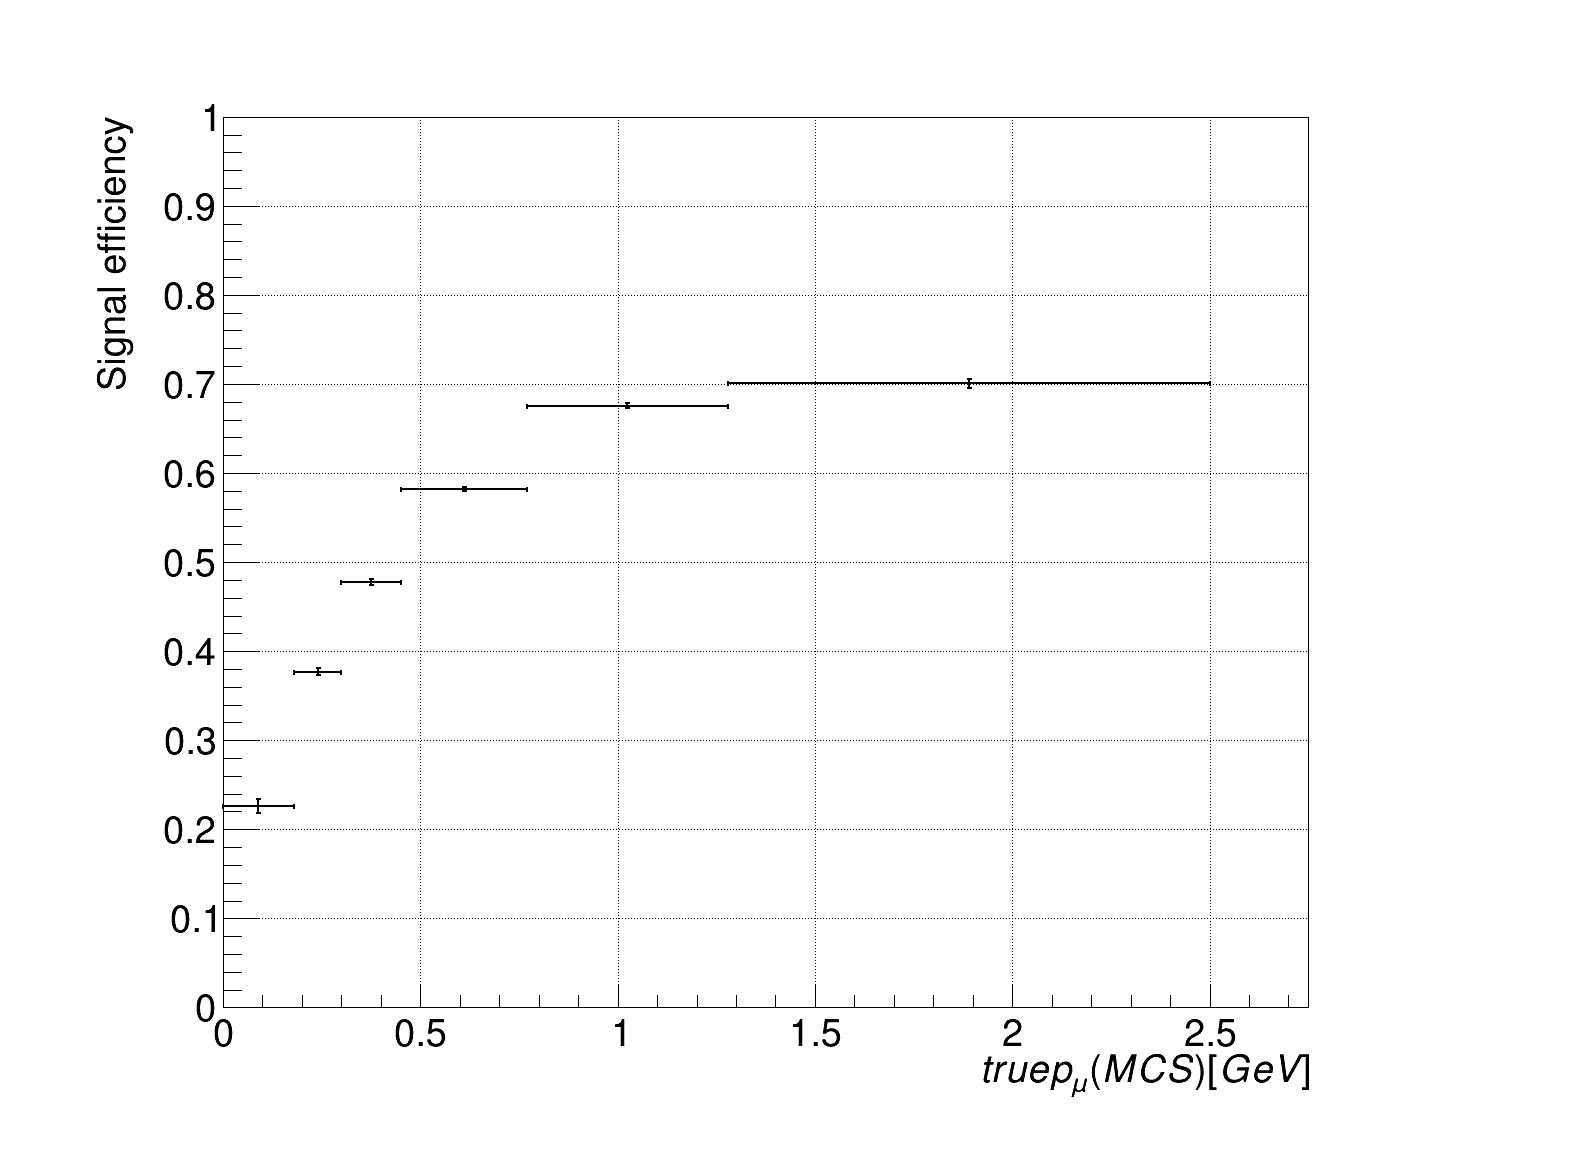

In [21]:

weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum momentum efficiency'
nenner_cut = 'numu_true'
zahler_cut = cut+' && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
detsys_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
detsys_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("true p_{\mu} (MCS) [GeV]")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.Draw("AP")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_trueMom.png")
c1.SaveAs(outputdir_root + "h_eff_trueMom.root")
c1.SaveAs(outputdir_pdf + "h_eff_trueMom.pdf")

eff.Write("h_eff_true")

19616

Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/root/h2_trueVsReco_Mom.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/png/h2_trueVsReco_Mom.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/pdf/h2_trueVsReco_Mom.pdf has been created


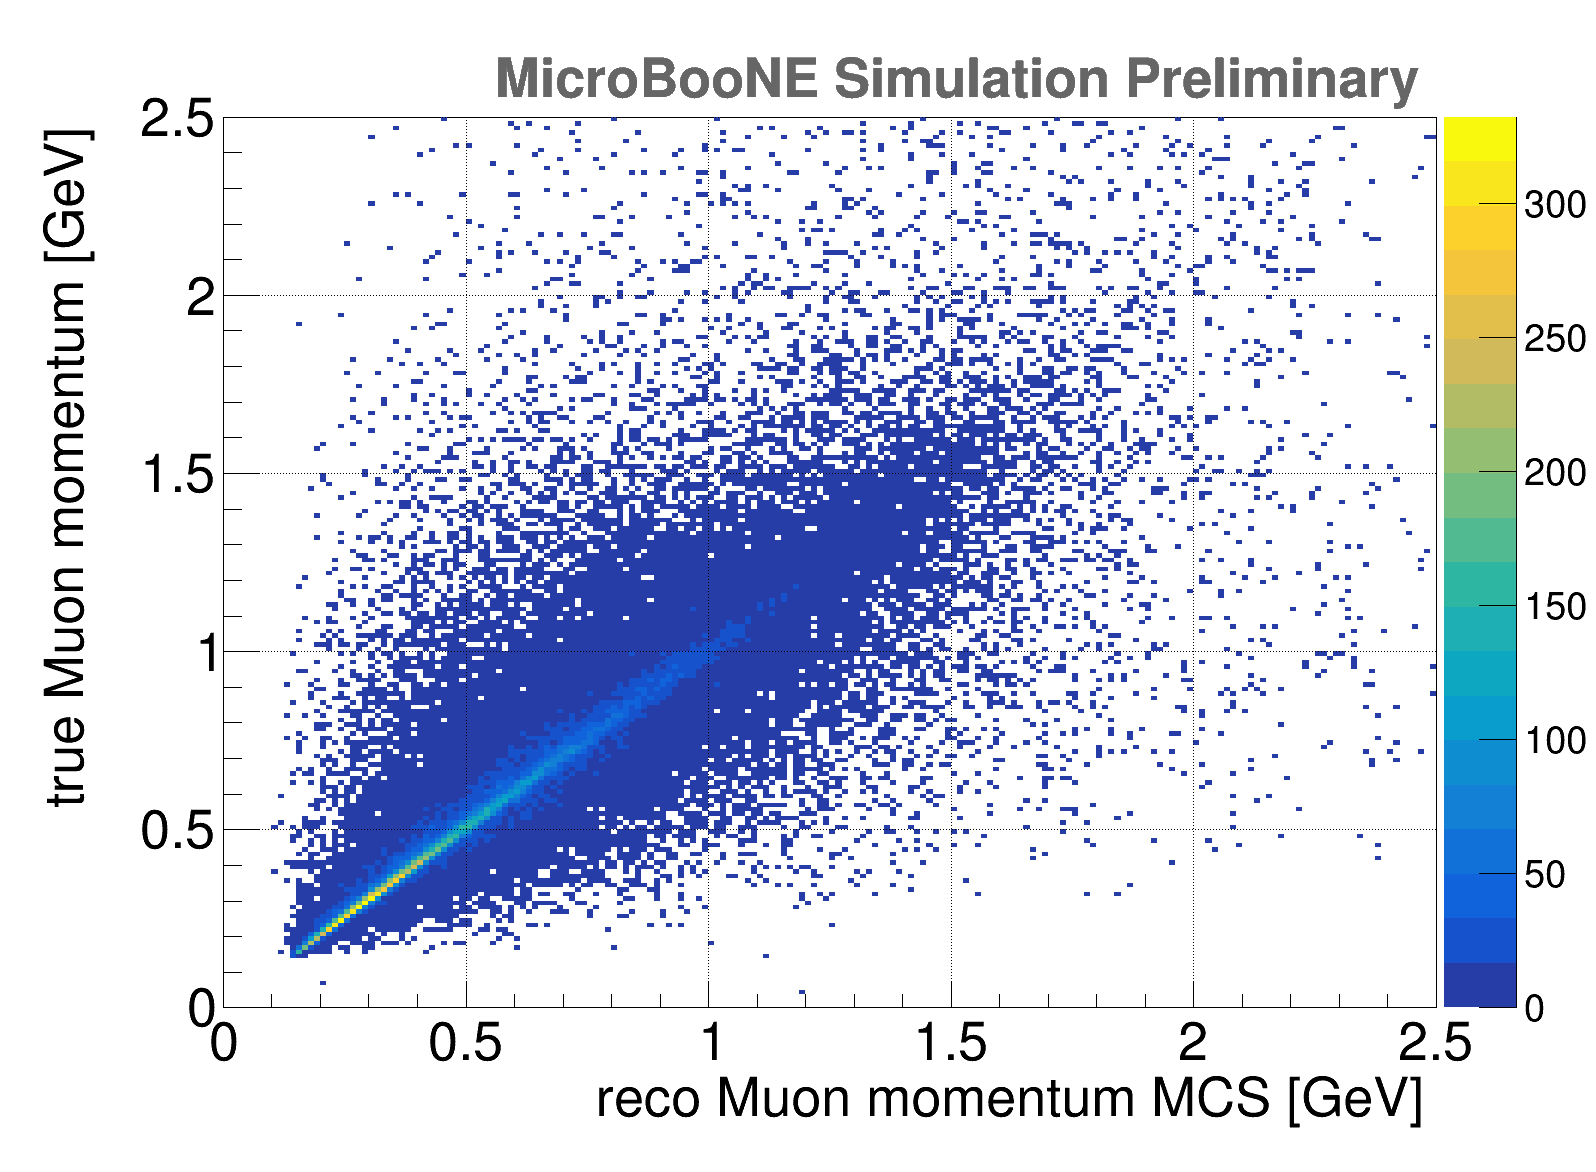

In [22]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,0,2.5,200,0,2.5)
h_migration_range = ROOT.TH2F("h_migration_range",'Truth vs. Reco',200,0,2.5,200,0,2.5)

detsys_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&& MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5 && track_end_uncontained)','')
detsys_out.Draw('MCle_Energy:TrackMomRange_mu'+'>>h_migration_range',weight_name+'*('+cut+'&& MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5 && !track_end_uncontained)','')

h_migration.Add(h_migration_range) #TrackMomRange_mu

h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
h_migration.Draw("colz")
prelim = draw_sim()
prelim.Draw()
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_trueVsReco_Mom.root")
c1.SaveAs(globale.outputdir_png + "h2_trueVsReco_Mom.png")
c1.SaveAs(globale.outputdir_pdf + "h2_trueVsReco_Mom.pdf")
h_migration.Write("h2_true_MCS_fine")

fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1
67841.0


686

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_migration_range (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/root/h2_trueVsReco_Mom_bin.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/png/h2_trueVsReco_Mom_bin.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/pdf/h2_trueVsReco_Mom_bin.pdf has been created


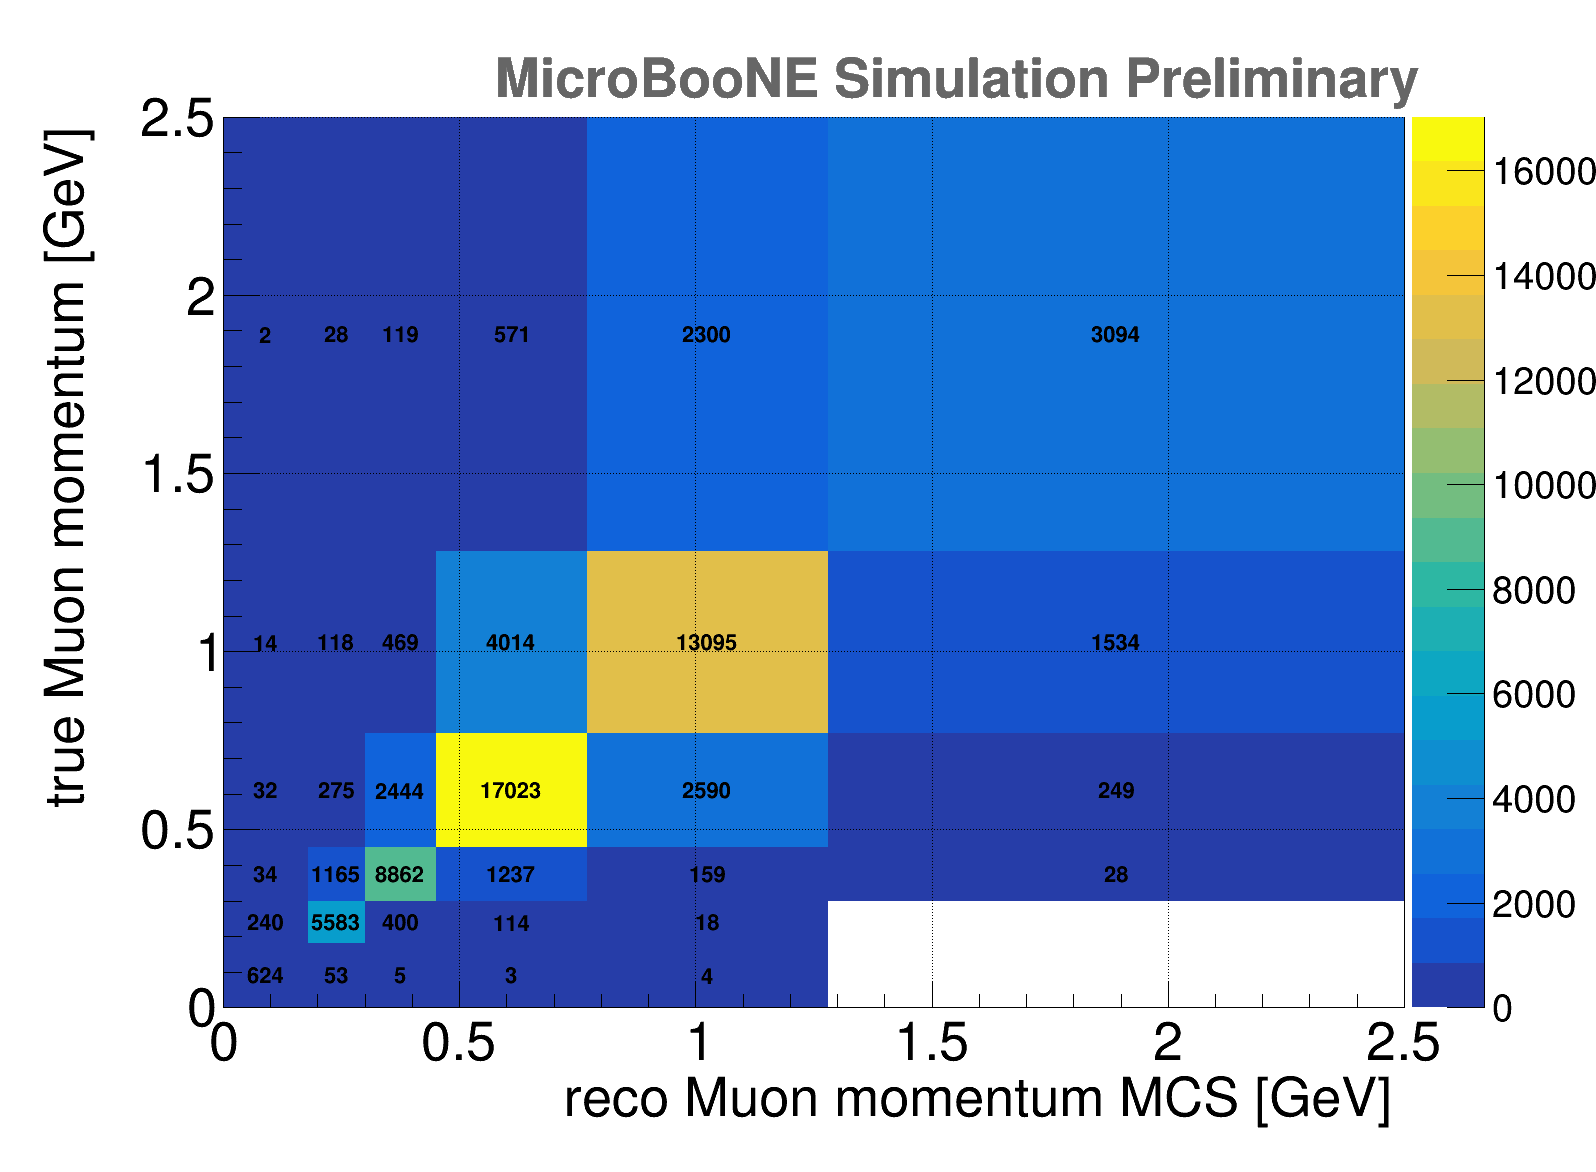

In [23]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
h_migration_range = ROOT.TH2F("h_migration_range",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
print cut
detsys_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&& MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5 && track_end_uncontained)','')
detsys_out.Draw('MCle_Energy:TrackMomRange_mu'+'>>h_migration_range',weight_name+'*('+cut+'&& MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5 && !track_end_uncontained)','')
h_migration.Add(h_migration_range) #TrackMomRange_mu
print h_migration.Integral(-1,201,-1,201)
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.Draw("colz")
h_migration.Draw("same text")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.0f')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_trueVsReco_Mom_bin.root")
c1.SaveAs(globale.outputdir_png + "h2_trueVsReco_Mom_bin.png")
c1.SaveAs(globale.outputdir_pdf + "h2_trueVsReco_Mom_bin.pdf")
h_migration.Write("h2_true_MCS_bin")

6


681

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/png/h_mitigation_matrix.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/root/h_mitigation_matrix.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/pdf/h_mitigation_matrix.pdf has been created


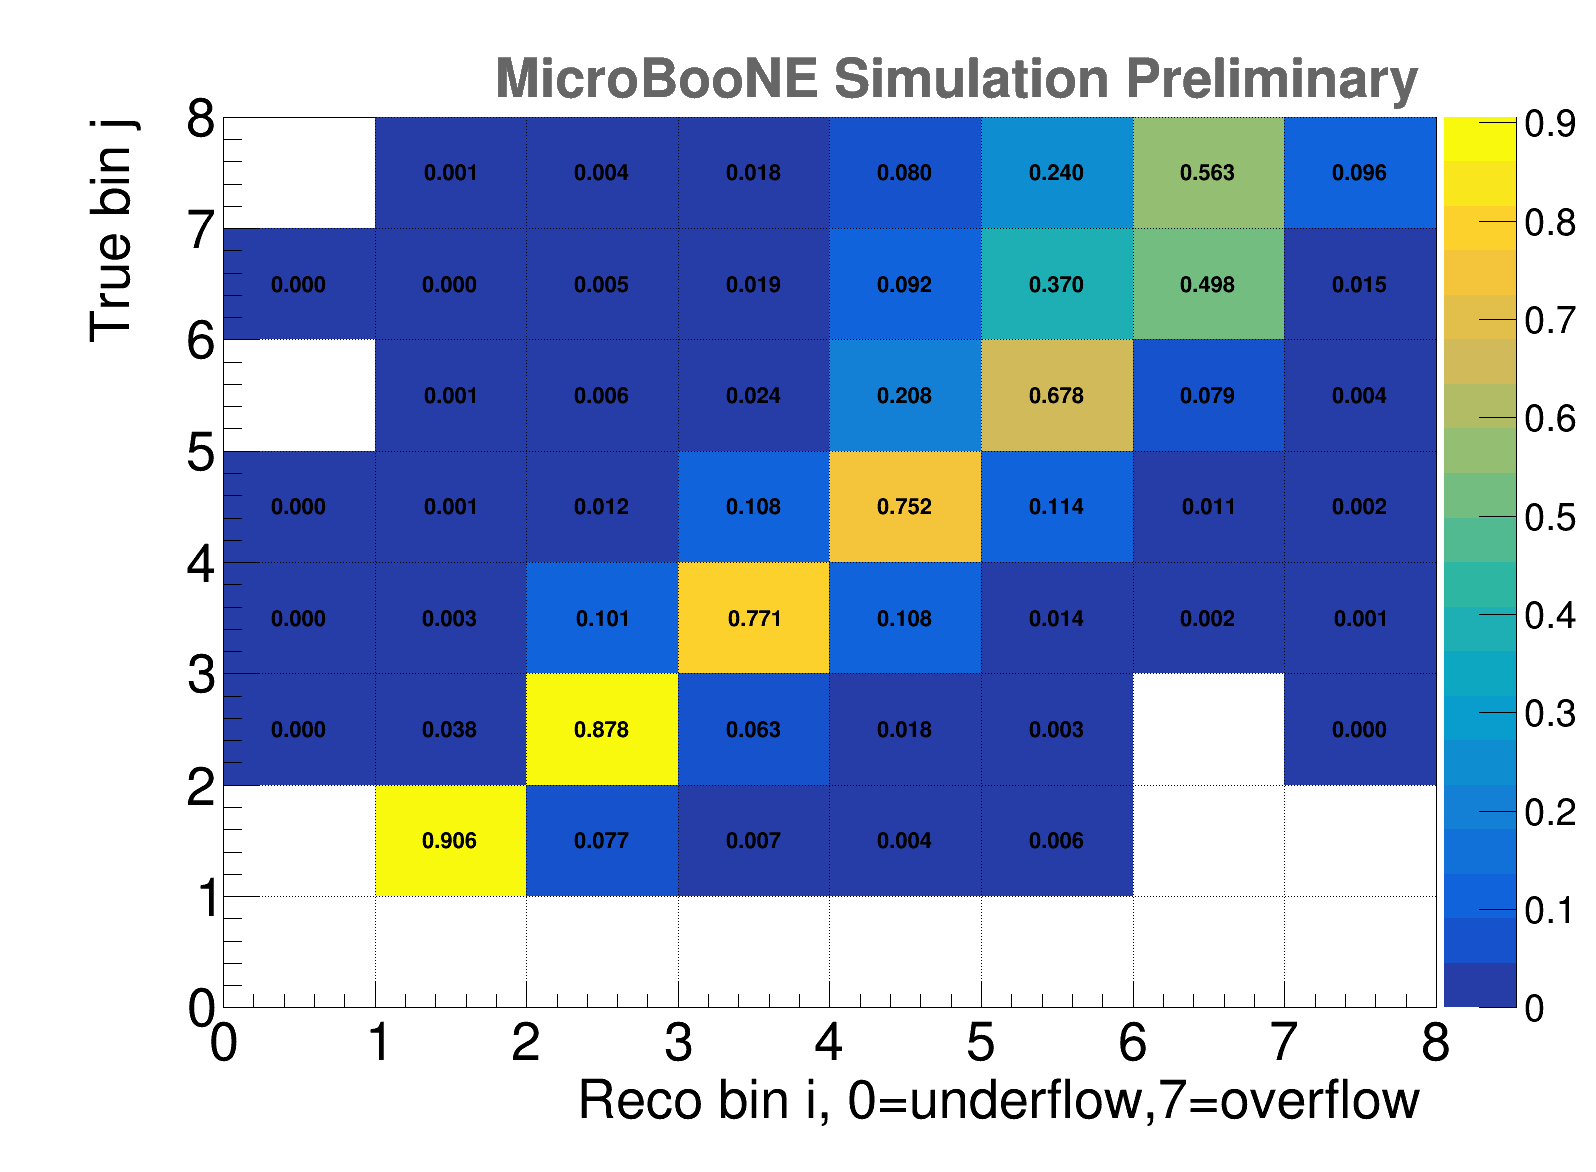

In [24]:
reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0,0.0,0.0]
mitigation_matrix = np.zeros((8,8))
print binnum
for j in range(0,binnum+2):
    for i in range(0,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        reco_entries[j]+=h_migration.GetBinContent(i,j)
h_mitigation_matrix = ROOT.TH2F("h_migration",'Migration matrix',8,0,8,8,0,8)
for j in range(0,binnum+2):
    for i in range(0,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        mitigation_matrix[i,j]= h_migration.GetBinContent(i,j)/(reco_entries[j]+1e-80)
        h_mitigation_matrix.SetBinContent(i+1,j+1,mitigation_matrix[i,j])
        #print i-1,j-1,mitigation_matrix[i-1,j-1]
        #true_entries[j]+=h_migration.GetBinContent(i,j)
#print mitigation_matrix
np.save(output_filedir+'migration_matrix_momentum',mitigation_matrix)
h_mitigation_matrix.SetXTitle("Reco bin i, 0=underflow,7=overflow")
h_mitigation_matrix.SetYTitle("True bin j")
h_mitigation_matrix.Draw('colz')
h_mitigation_matrix.Draw('same text')
h_mitigation_matrix.GetYaxis().SetTitleSize(0.05)
h_mitigation_matrix.GetYaxis().SetTitleOffset(0.0)
h_mitigation_matrix.GetYaxis().SetLabelSize(0.05)
h_mitigation_matrix.GetXaxis().SetTitleSize(0.05)
h_mitigation_matrix.GetXaxis().SetLabelSize(0.05)
h_mitigation_matrix.GetXaxis().SetTitleOffset(1)
h_mitigation_matrix.SetLineColor(ROOT.kBlack)
h_mitigation_matrix.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_mitigation_matrix.png")
c1.SaveAs(globale.outputdir_root + "h_mitigation_matrix.root")
c1.SaveAs(globale.outputdir_pdf + "h_mitigation_matrix.pdf")

h_mitigation_matrix.Write("h_mitigation_matrix")

In [25]:
# Nselected and N generated
title = 'MCS momentum efficiency'
weight_name = 'EventWeight*TunedCentralValue_Genie'
nenner_cut = 'numu_true'
zahler_cut = cut+' && '+numu_signal
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
detsys_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
detsys_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')

h_init_eff_energy.Write("h_eff_true_energy_z")
h_init_eff_energy_1.Write("h_eff_true_energy_n")

418

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).


In [26]:
# e tilde
N_sel = np.zeros((8))
N_gen = np.zeros((8))
for i in range(0,binnum+2):
    N_sel[i] = h_init_eff_energy.GetBinContent(i)
    N_gen[i] = h_init_eff_energy_1.GetBinContent(i)
    print N_sel[i],N_gen[i],N_sel[i]/N_gen[i]
eff_tilde = np.zeros((8))
eff_tilde = mitigation_matrix.dot(N_sel)/(mitigation_matrix.dot(N_gen))
print eff_tilde
np.save(output_filedir+'eff_tilde_momentum_xsec_CV',eff_tilde)
print output_filedir

0.0 0.0 nan
654.0 2889.0 0.22637590861889928
6357.0 16861.0 0.37702390131071706
11492.0 24051.0 0.47781797014677146
22648.0 38892.0 0.5823305564126299
19315.0 28584.0 0.6757276798208788
6210.0 8864.0 0.7005866425992779
1130.0 1698.0 0.6654888103651354
[0.50698294 0.26887418 0.39773029 0.49833873 0.59066606 0.66048061
 0.6816903  0.66099429]
/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


In [27]:
h_eff = h_init_eff_energy.Clone()
h_eff.Divide(h_init_eff_energy_1)

True

458

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/png/h_eff_tilde_xsecMom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/root/h_eff_tilde_xsecMom.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/pdf/h_eff_tilde_xsecMom.pdf has been created


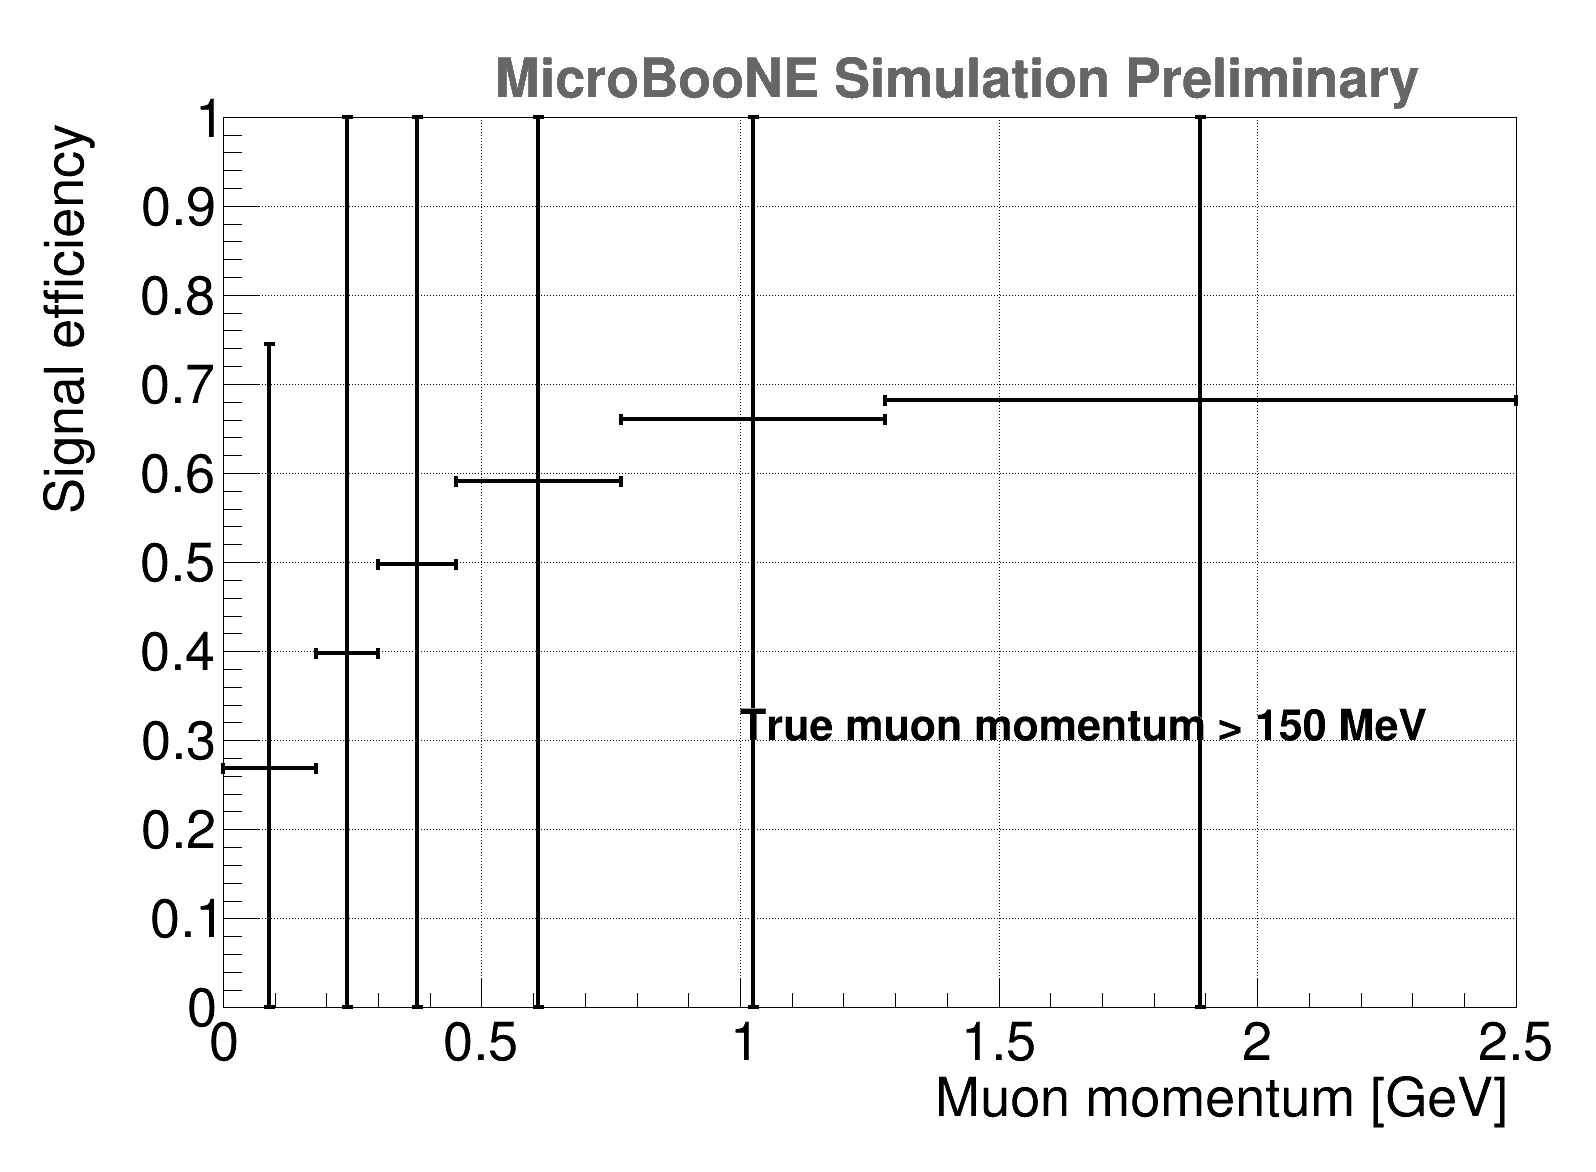

In [28]:
h_eff_tilde = ROOT.TH1F("h_eff_tilde",'Efficiency tilde',binnum,array('f',mom_bins))
for i in range(1,binnum+1):
    h_eff_tilde.SetBinContent(i,eff_tilde[i])
    h_eff_tilde.SetBinError(i,h_eff.GetBinError(i))
h_eff_tilde.SetMaximum(1)
h_eff_tilde.SetMinimum(0)
h_eff_tilde.SetLineWidth(3)

h_eff_tilde.SetXTitle("Muon momentum [GeV]")
h_eff_tilde.SetYTitle("Signal efficiency")
h_eff_tilde.GetYaxis().SetTitleSize(0.05)
h_eff_tilde.GetYaxis().SetTitleOffset(0.0)
h_eff_tilde.GetYaxis().SetLabelSize(0.05)
h_eff_tilde.GetXaxis().SetTitleSize(0.05)
h_eff_tilde.GetXaxis().SetLabelSize(0.05)
h_eff_tilde.GetXaxis().SetTitleOffset(1)
h_eff_tilde.SetLineColor(ROOT.kBlack)
h_eff_tilde.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_eff_tilde.Draw('E1')
prelim = draw_sim()
prelim.Draw()
t = ROOT.TLatex(1,0.3,"True muon momentum > 150 MeV");
t.SetTextFont(62);
t.SetTextSize(1/25.);
t.Draw();
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_tilde_xsecMom.png")
c1.SaveAs(globale.outputdir_root + "h_eff_tilde_xsecMom.root")
c1.SaveAs(globale.outputdir_pdf + "h_eff_tilde_xsecMom.pdf")

h_eff_tilde.Write("h_eff_tilde")

In [29]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'TrackMomMCS_mom'
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

h_data = ROOT.TH1F("h_data",'h_data',binnum,array('f',mom_bins))
h_ext = ROOT.TH1F("h_ext",'h_ext',binnum,array('f',mom_bins))
h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum,array('f',mom_bins))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum,array('f',mom_bins))
h_signal = ROOT.TH1F("h_signal",'h_signal',binnum,array('f',mom_bins))

h_data_r = ROOT.TH1F("h_data_r",'h_data_r',binnum,array('f',mom_bins))
h_ext_r = ROOT.TH1F("h_ext_r",'h_ext_r',binnum,array('f',mom_bins))
h_dirt_r = ROOT.TH1F("h_dirt_r",'h_dirt_r',binnum,array('f',mom_bins))
h_overlay_r = ROOT.TH1F("h_overlay_r",'h_overlay_r',binnum,array('f',mom_bins))
h_signal_r = ROOT.TH1F("h_signal_r",'h_signal_r',binnum,array('f',mom_bins))
#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

globale.data_out.Draw(variable+'>>h_data',cut+' && track_end_uncontained','')
globale.ext_out.Draw(variable+'>>h_ext',cut+' && track_end_uncontained','')
globale.dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+ '&& track_end_uncontained)','')
detsys_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !numu_signal && track_end_uncontained)','')
detsys_out.Draw(variable+'>>h_signal',weight_name+'*('+cut+'&& numu_signal && track_end_uncontained)','')

globale.data_out.Draw('TrackMomRange_mu'+'>>h_data_r',cut+' && !track_end_uncontained','')
globale.ext_out.Draw('TrackMomRange_mu'+'>>h_ext_r',cut+' && !track_end_uncontained','')
globale.dirt_out.Draw('TrackMomRange_mu'+'>>h_dirt_r',weight_name+'*('+cut+ '&& !track_end_uncontained)','')
detsys_out.Draw('TrackMomRange_mu'+'>>h_overlay_r',weight_name+'*('+cut+'&& !numu_signal && !track_end_uncontained)','')
detsys_out.Draw('TrackMomRange_mu'+'>>h_signal_r',weight_name+'*('+cut+'&& numu_signal && !track_end_uncontained)','')

h_data.Add(h_data_r)
h_ext.Add(h_ext_r)
h_dirt.Add(h_dirt_r)
h_overlay.Add(h_overlay_r)
h_signal.Add(h_signal_r)

h_true = ROOT.TH1F("h_true",'h_true',binnum,array('f',mom_bins))
detsys_out.Draw(variable+'>>h_true',weight_name+'*(numu_true && track_end_uncontained)','')
h_true_r = ROOT.TH1F("h_true_r",'h_true_r',binnum,array('f',mom_bins))
detsys_out.Draw('TrackMomRange_mu'+'>>h_true_r',weight_name+'*(numu_true && !track_end_uncontained)','')
h_true.Add(h_true_r)


True

In [30]:
h_data.Sumw2()
h_ext.Sumw2()
h_dirt.Sumw2()
h_overlay.Sumw2()
h_data.Scale(scale[data])
h_ext.Scale(scale[ext])
h_dirt.Scale(scale[dirt])
h_overlay.Scale(scale_out[detsys_out])

h_data.Write("h_data")
h_ext.Write("h_ext")
h_dirt.Write("h_dirt")
h_overlay.Write("h_overlay")

432

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [31]:
print h_overlay.GetSumOfWeights()
h_data.Add(h_ext,-1)
h_data.Add(h_dirt,-1)
h_data.Add(h_overlay,-1)
print h_data.GetSumOfWeights()

182.833716393
989.30267334


In [32]:
h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux))

In [33]:

h_overlay_sig = h_signal.Clone()
h_overlay_sig.Scale(scale[overlay])
h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux))

In [34]:
for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))
    h_data.SetBinError(i,h_data.GetBinError(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinError(i,h_overlay_sig.GetBinError(i)/h_overlay_sig.GetBinWidth(i))
    print h_data.GetBinContent(i)/h_data.GetBinWidth(i)

6.06689032025e-39
8.63093671369e-38
7.13056255263e-38
2.96686771069e-38
5.70870046297e-39
1.50342092617e-40


418

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/png/h_xsec_corr.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/root/h_xsec_corr.root has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/root/h_xsec_corr.root has been created


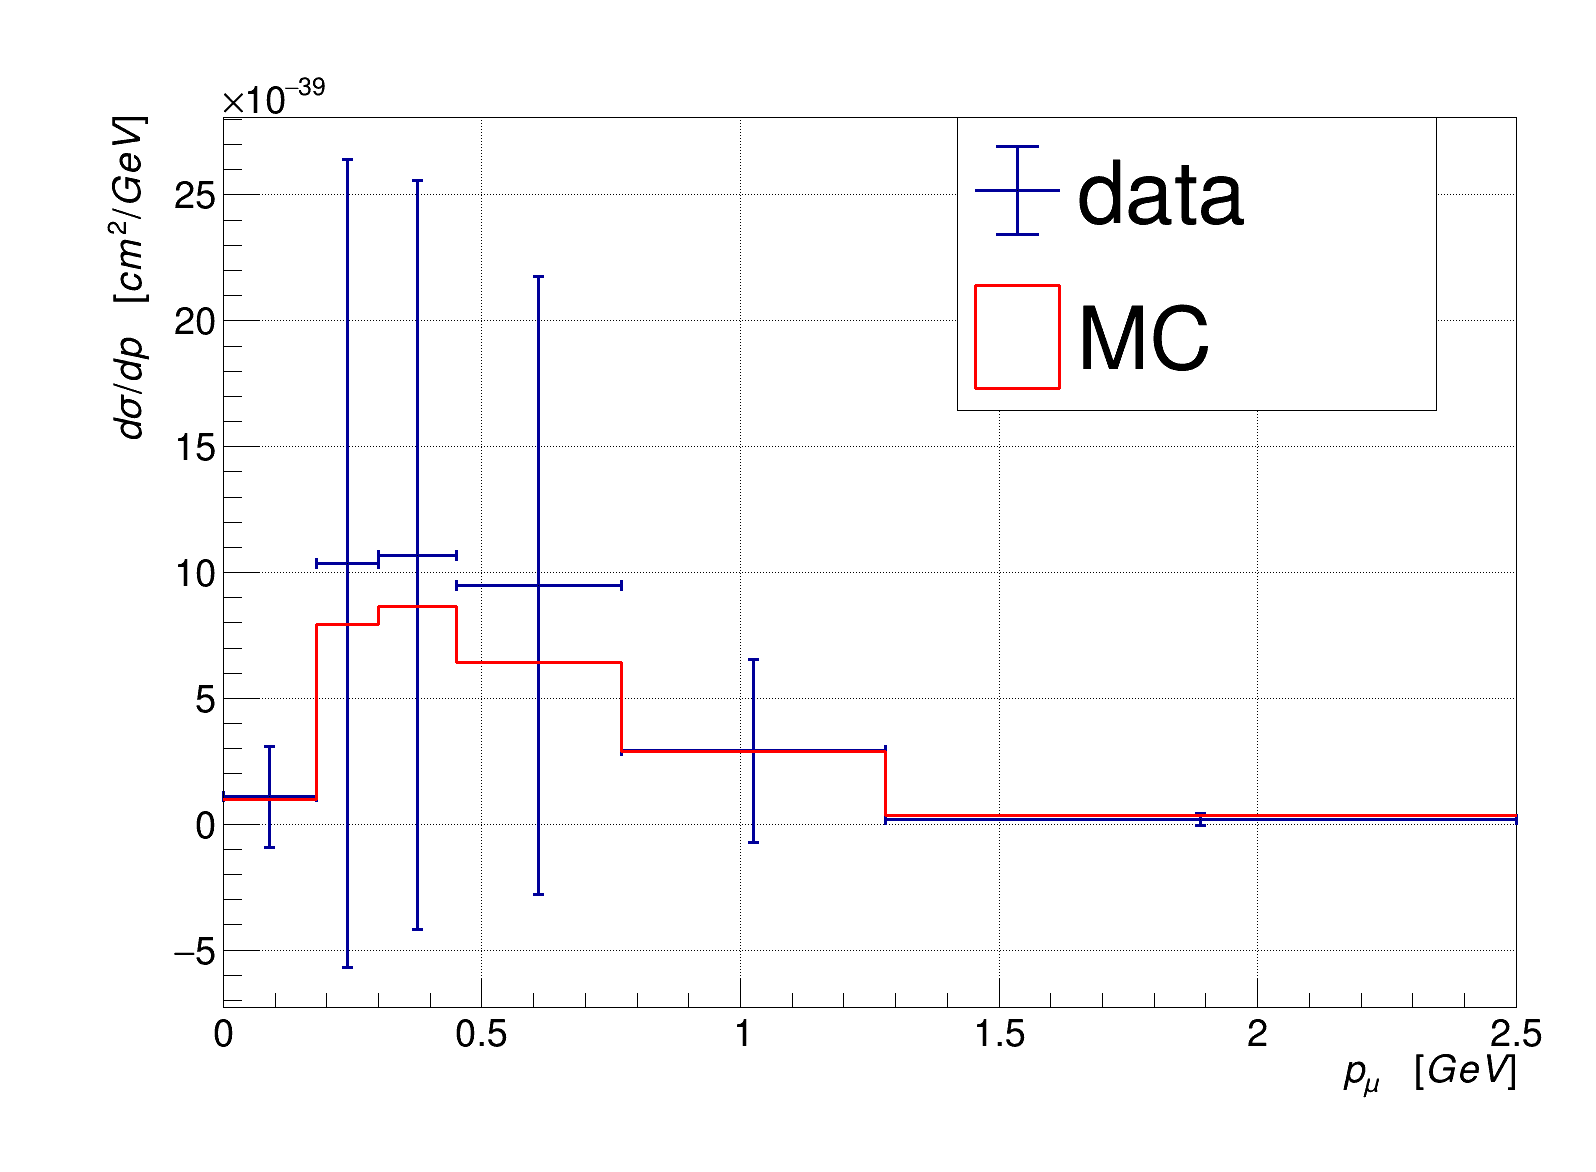

In [35]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("d\sigma / dp \t [cm^{2}/GeV]")
h_data.SetXTitle("p_{\mu} \t [GeV]")
h_data.SetLineWidth(3)
h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(3)
h_overlay_sig.Draw('hist same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_corr.png")
c1.SaveAs(outputdir_root + "h_xsec_corr.root")
c1.SaveAs(outputdir_root + "h_xsec_corr.root")

h_data.Write("h_xsec_data")
h_overlay_sig.Write("h_xsec_MC")

# Now in bins of Theta

In [36]:
from array import array
mom_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]
binnum = len(mom_bins) - 1
#h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))

657

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/png/h_eff_trueTheta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/root/h_eff_trueTheta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/pdf/h_eff_trueTheta.pdf has been created


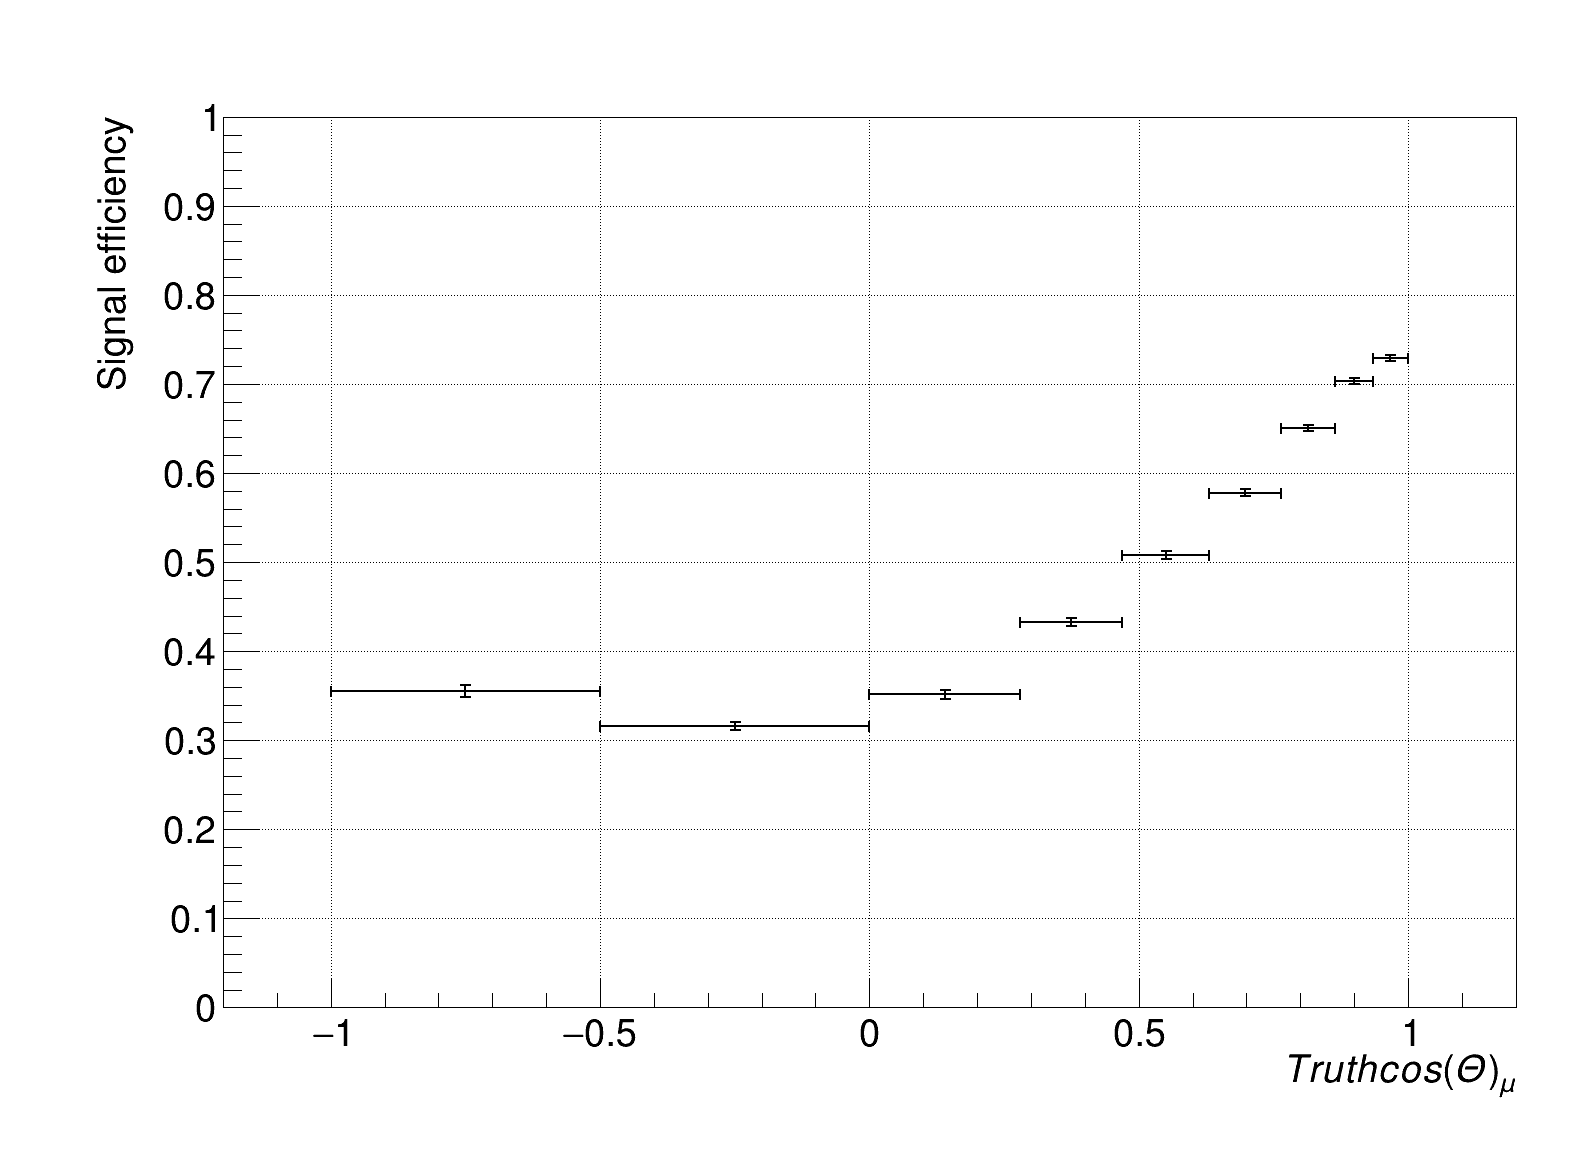

In [37]:
# calculate true theta
weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum theta efficiency'
nenner_cut = 'numu_true'
zahler_cut = cut+' && '+numu_signal
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
detsys_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
detsys_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("Truth cos(\Theta)_{\mu}")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.Draw("AP")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_trueTheta.png")
c1.SaveAs(outputdir_root + "h_eff_trueTheta.root")
c1.SaveAs(outputdir_pdf + "h_eff_trueTheta.pdf")

eff.Write("h_eff_true_theta")

17658

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/root/h2_true_Theta.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/png/h2_true_Theta.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/pdf/h2_true_Theta.pdf has been created


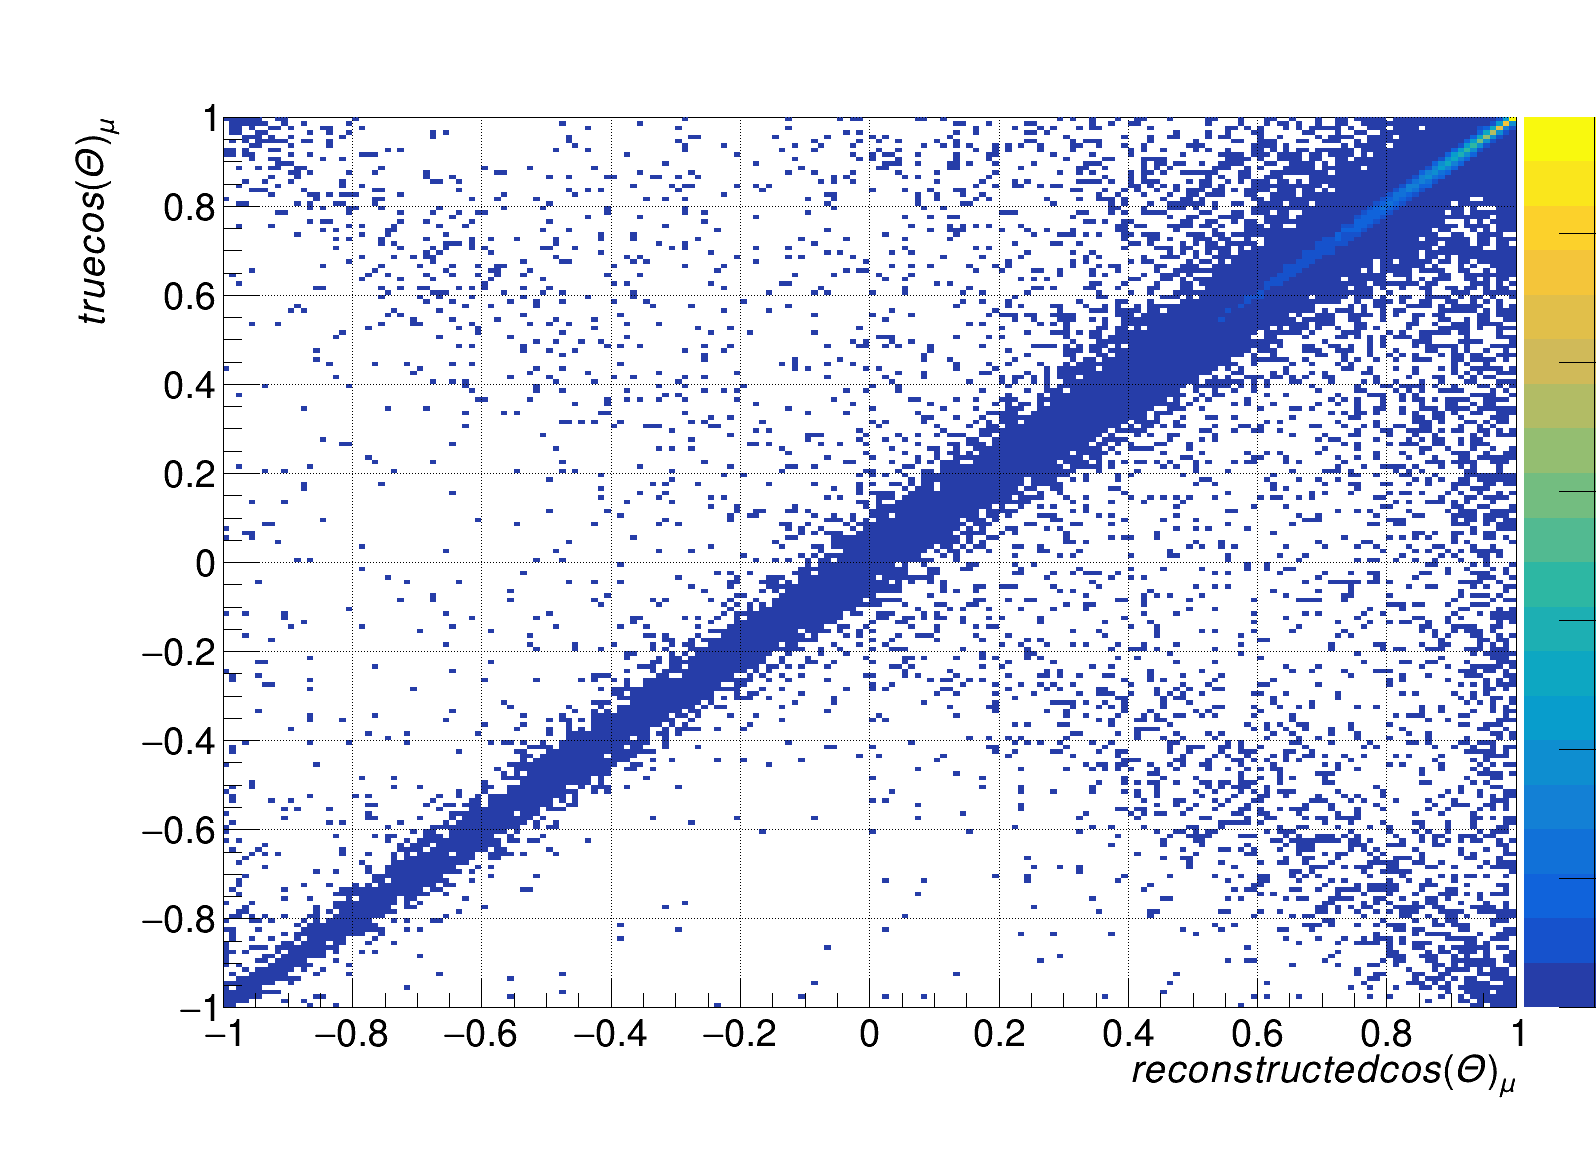

In [38]:
# plot fine binned reco true
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,-1,1,200,-1,1)
detsys_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration',weight_name+'*('+cut+'&&'+'numu_true'+')','')
h_migration.SetXTitle("reconstructed cos(\Theta)_{\mu}")
h_migration.SetYTitle("true cos(\Theta)_{\mu}")
h_migration.Draw("colz")
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h2_true_Theta.root")
c1.SaveAs(outputdir_png + "h2_true_Theta.png")
c1.SaveAs(outputdir_pdf + "h2_true_Theta.pdf")

h_migration.Write("h2_true_theta_fine")

777

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/root/h2_true_Theta_bin.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/png/h2_true_Theta_bin.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/pdf/h2_true_Theta_bin.pdf has been created


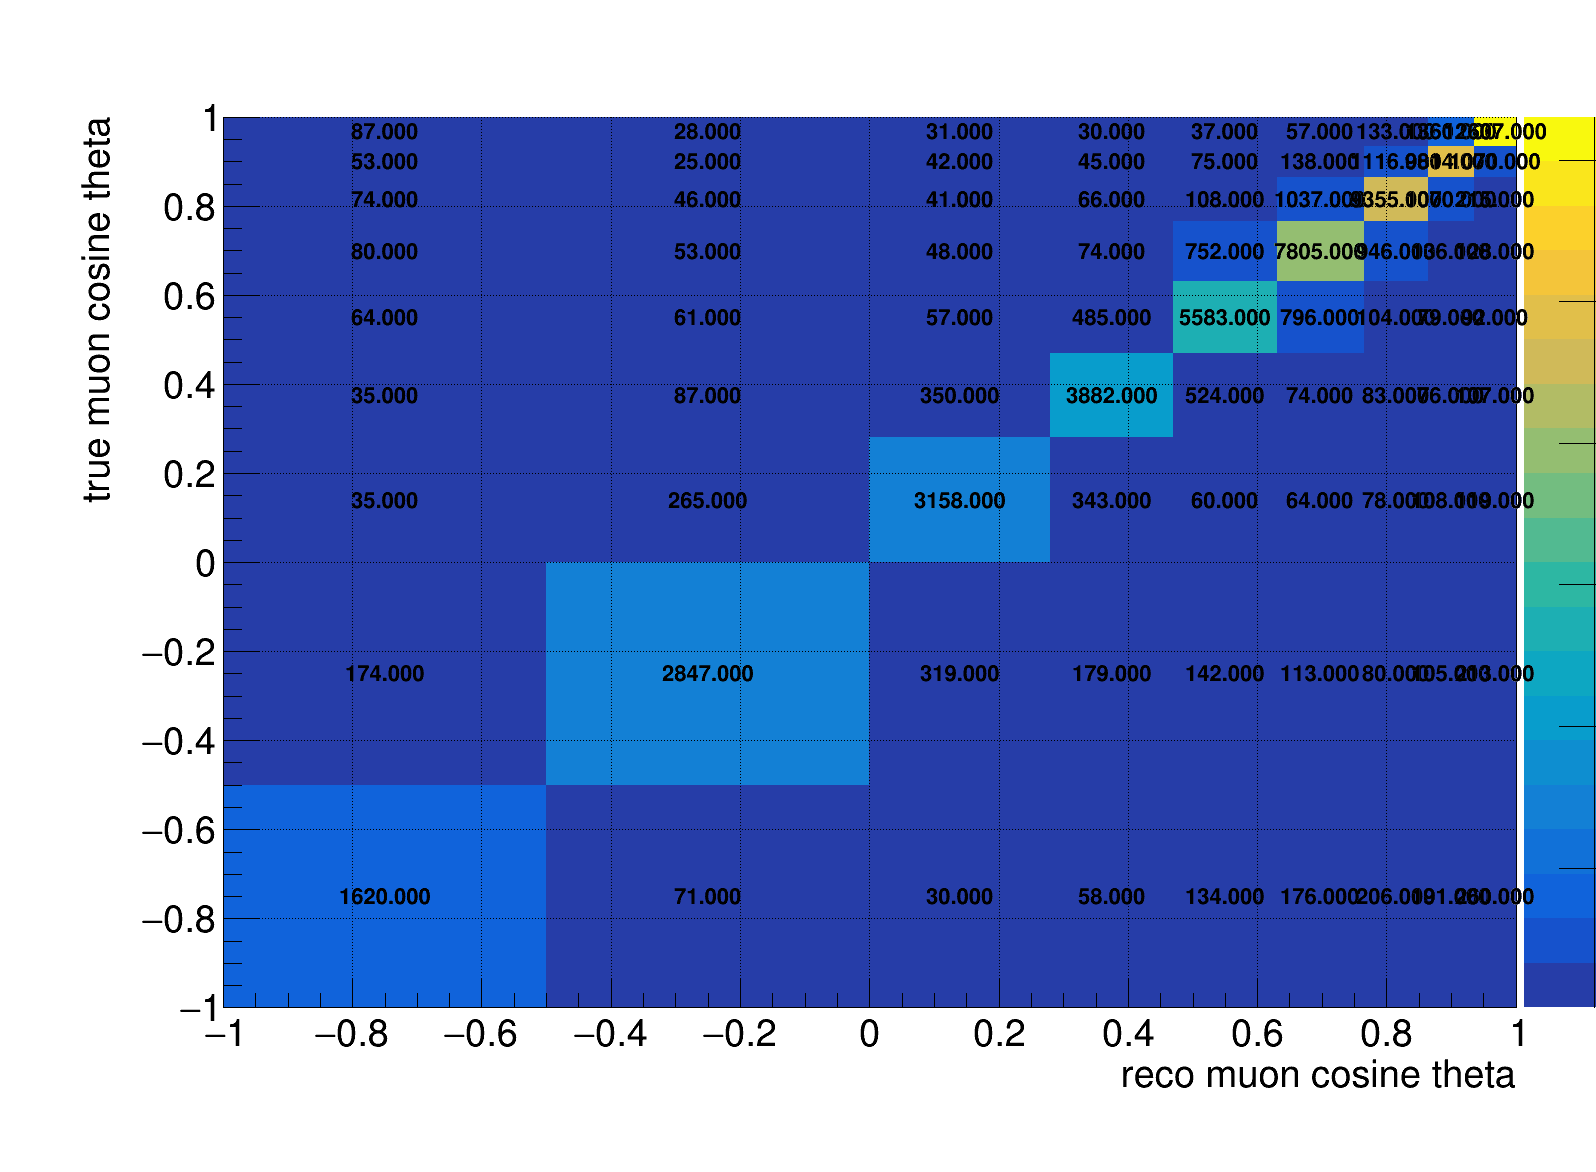

In [39]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
detsys_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration',weight_name+'*('+cut+'&&'+'numu_true'+')','')
h_migration.SetXTitle("reco muon cosine theta")
h_migration.SetYTitle("true muon cosine theta")
h_migration.Draw("colz")
h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h2_true_Theta_bin.root")
c1.SaveAs(outputdir_png + "h2_true_Theta_bin.png")
c1.SaveAs(outputdir_pdf + "h2_true_Theta_bin.pdf")
h_migration.Write("h2_true_Theta_bin")

[[0.58994902 0.04170662 0.00827423 0.00670755 0.00874198 0.00798244
  0.00616051 0.00428179 0.00605428]
 [0.02585579 0.68240652 0.06264775 0.01667305 0.0083322  0.00528837
  0.0038295  0.00201971 0.0019485 ]
 [0.01092498 0.07646213 0.7465721  0.06707551 0.00778582 0.00478946
  0.00341325 0.00339312 0.00215727]
 [0.02112163 0.04290508 0.08108747 0.7439632  0.06624778 0.00738376
  0.00549451 0.00363548 0.00208768]
 [0.04879825 0.03403643 0.0141844  0.10042162 0.76260074 0.07503492
  0.00899101 0.00605914 0.00257481]
 [0.06409323 0.02708533 0.01513002 0.01418168 0.10872832 0.77878667
  0.08633034 0.01114881 0.0039666 ]
 [0.07501821 0.01917546 0.01843972 0.01590648 0.01420571 0.09439234
  0.77880453 0.09015996 0.00925539]
 [0.06955572 0.02516779 0.02553191 0.01456497 0.01079088 0.01357015
  0.08907759 0.7928583  0.09464161]
 [0.09468318 0.05105465 0.02813239 0.02050594 0.01256659 0.0127719
  0.01789877 0.08644369 0.87731385]]


838

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/png/h_mitigation_theta_matrix.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/root/h_mitigation_theta_matrix.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/pdf/h_mitigation_theta_matrix.pdf has been created


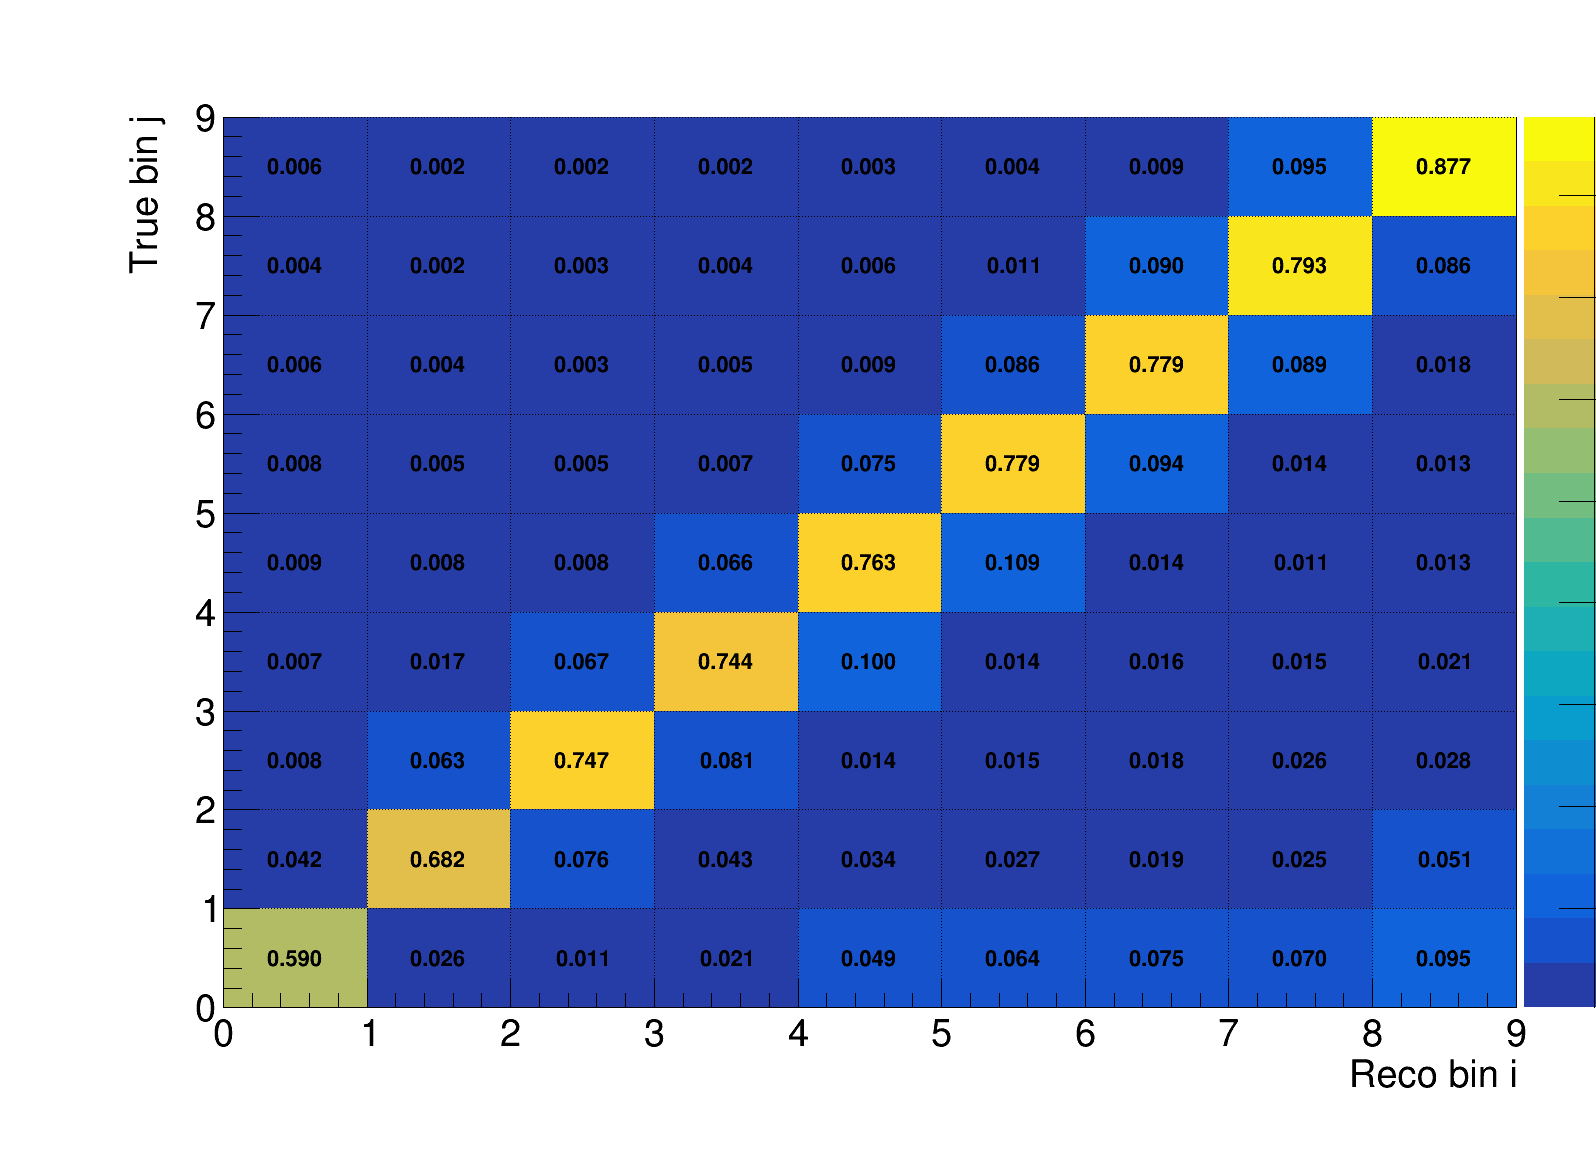

In [40]:
reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mitigation_matrix = np.zeros((9,9))
for j in range(1,binnum+1):
    for i in range(1,binnum+1):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        reco_entries[j-1]+=h_migration.GetBinContent(i,j)
h_mitigation_matrix = ROOT.TH2F("h_migration",'Migration matrix',9,0,9,9,0,9)
for j in range(1,binnum+1):
    for i in range(1,binnum+1):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        mitigation_matrix[i-1,j-1]= h_migration.GetBinContent(i,j)/reco_entries[j-1]
        h_mitigation_matrix.SetBinContent(i,j,mitigation_matrix[i-1,j-1])
        #print i-1,j-1,mitigation_matrix[i-1,j-1]
        #true_entries[j]+=h_migration.GetBinContent(i,j)
print mitigation_matrix
np.save(output_filedir+'migration_matrix_theta',mitigation_matrix)
h_mitigation_matrix.SetXTitle("Reco bin i")
h_mitigation_matrix.SetYTitle("True bin j")
h_mitigation_matrix.Draw('colz')
h_mitigation_matrix.Draw('same text')

c1.Draw()
c1.SaveAs(outputdir_png + "h_mitigation_theta_matrix.png")
c1.SaveAs(outputdir_root + "h_mitigation_theta_matrix.root")
c1.SaveAs(outputdir_pdf + "h_mitigation_theta_matrix.pdf")

h_mitigation_matrix.Write("h_mitigation_theta_matrix")

In [41]:
# Nselected and N generated
title = 'cosine theta efficiency'
weight_name = 'EventWeight*TunedCentralValue_Genie'
nenner_cut = 'numu_true'
zahler_cut = cut+' && '+numu_signal
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
detsys_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
detsys_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')

h_init_eff_energy.Write("h_eff_true_theta_z")
h_init_eff_energy_1.Write("h_eff_true_theta_n")

429

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).


In [42]:
# e tilde
N_sel = np.zeros((9))
N_gen = np.zeros((9))
Err_sel = np.zeros((9))
Err_gen = np.zeros((9))
for i in range(1,binnum+1):
    N_sel[i-1] = h_init_eff_energy.GetBinContent(i)
    N_gen[i-1] = h_init_eff_energy_1.GetBinContent(i)
    Err_sel[i-1] = h_init_eff_energy.GetBinError(i)
    Err_gen[i-1] = h_init_eff_energy_1.GetBinError(i)
    print N_sel[i-1],N_gen[i-1],N_sel[i-1]/N_gen[i-1]
eff_tilde = np.zeros((9))
eff_tilde = mitigation_matrix.dot(N_sel)/(mitigation_matrix.dot(N_gen))
err_tilde = np.zeros((9))
err_tilde = mitigation_matrix.dot(Err_sel)/(mitigation_matrix.dot(Err_gen))
print eff_tilde
print err_tilde
np.save(output_filedir+'eff_tilde_theta_xsec_CV',eff_tilde)


2021.0 5692.0 0.3550597329585383
3390.0 10734.0 0.31581889323644496
3646.0 10374.0 0.3514555619818778
4735.0 10940.0 0.4328153564899452
6822.0 13432.0 0.5078916021441334
9491.0 16430.0 0.5776628119293974
11577.0 17797.0 0.650502893746137
12039.0 17117.0 0.7033358649296021
14085.0 19323.0 0.7289240801117839
[0.38533075 0.33274288 0.36373484 0.43307286 0.50218772 0.56769528
 0.632233   0.67773395 0.69340649]
[0.60880973 0.57380448 0.60034728 0.65501755 0.70437088 0.74793449
 0.7881854  0.81508712 0.82050096]


In [43]:
for i in range(1,binnum+1):
    Err_sel[i-1] =  (eff.GetEfficiencyErrorLow(i) +  eff.GetEfficiencyErrorUp(i))/2.0
    print Err_sel[i-1]
    
err_tilde = mitigation_matrix.dot(Err_sel)
print err_tilde

0.006394913755342901
0.0045081925689540725
0.004709405071844253
0.0047562516470738
0.004326812754675946
0.003862395468383517
0.003582343906385177
0.003501175540614354
0.003205870322942561
[0.00415669 0.00369961 0.00433272 0.00460311 0.00466106 0.00451013
 0.00429001 0.00424533 0.00434871]


525

Warning in <TFile::Append>: Replacing existing TH1: h_eff_tilde (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/png/h_eff_tilde_xsecTheta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/root/h_eff_tilde_xsecTheta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/root/h_eff_tilde_xsecTheta.pdf has been created


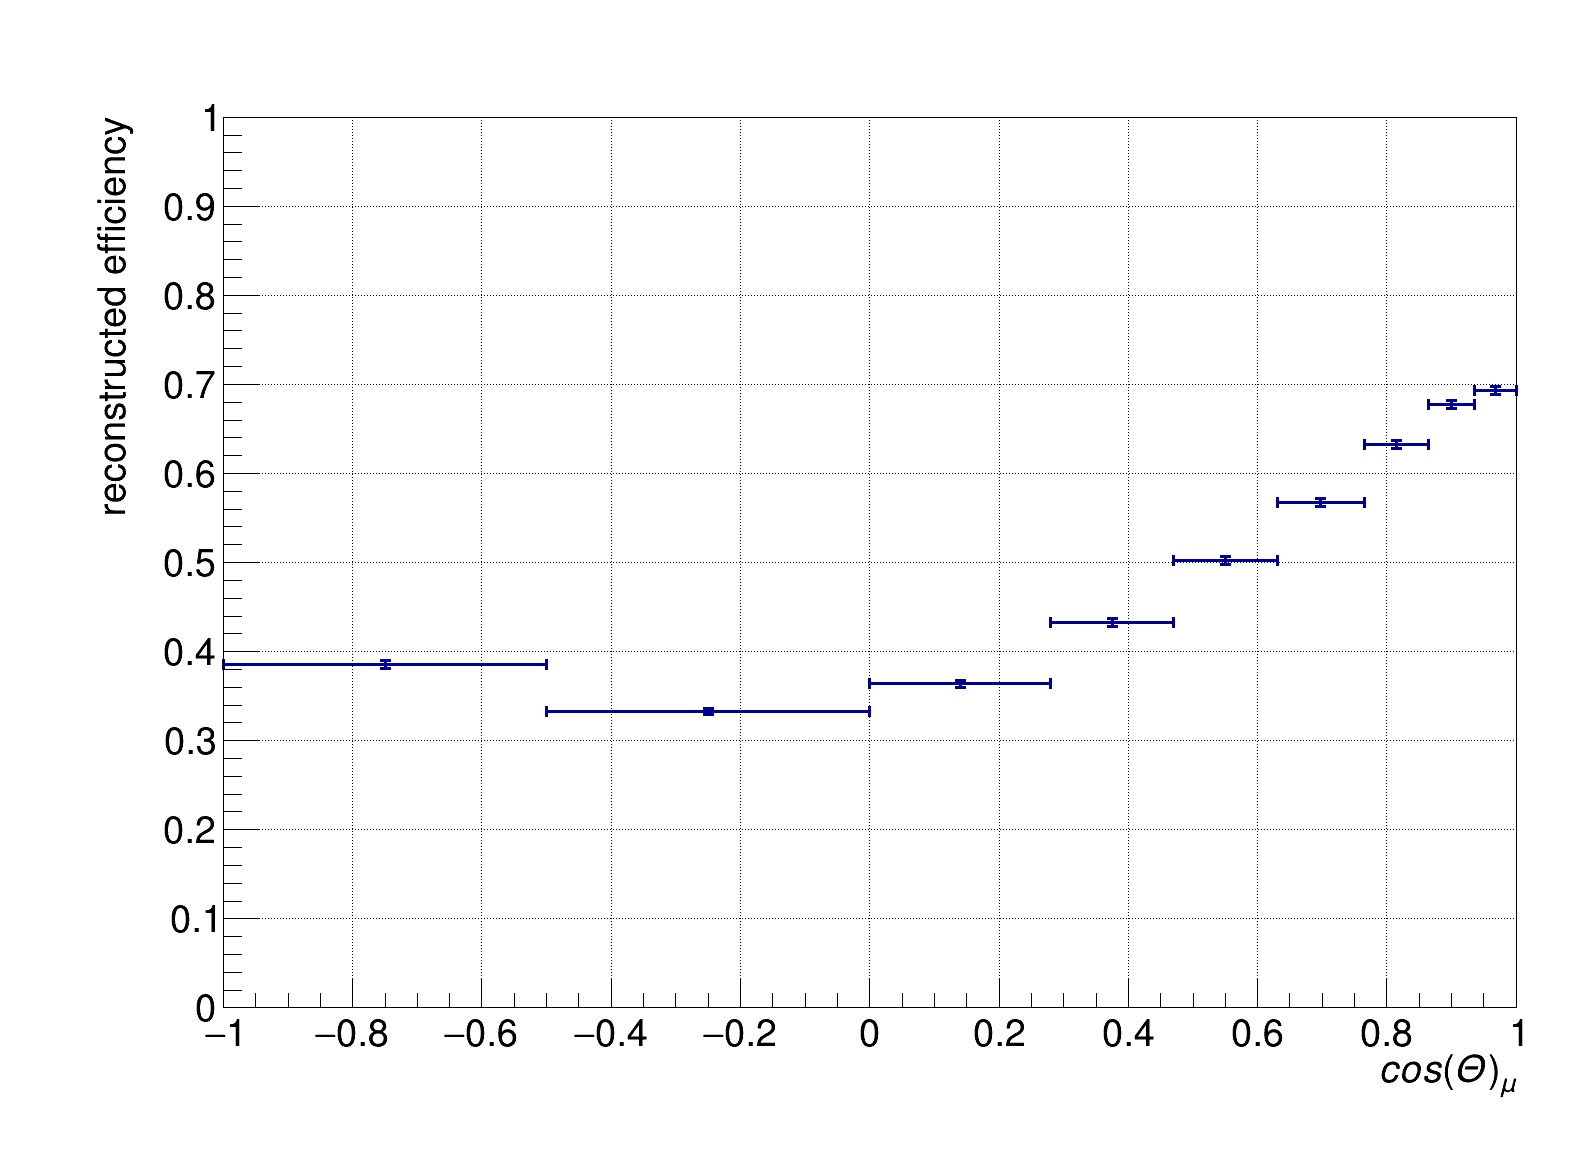

In [44]:
h_eff_tilde = ROOT.TH1F("h_eff_tilde",'Efficiency tilde',binnum,array('f',mom_bins))
for i in range(1,binnum+1):
    h_eff_tilde.SetBinContent(i,eff_tilde[i-1])
    h_eff_tilde.SetBinError(i,err_tilde[i-1])
h_eff_tilde.SetMaximum(1)
h_eff_tilde.SetMinimum(0)
h_eff_tilde.SetLineWidth(3)
h_eff_tilde.SetXTitle("cos(\Theta)_{\mu}")
h_eff_tilde.SetYTitle("reconstructed efficiency")
h_eff_tilde.Draw('E1')
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_tilde_xsecTheta.png")
c1.SaveAs(outputdir_root + "h_eff_tilde_xsecTheta.root")
c1.SaveAs(outputdir_root + "h_eff_tilde_xsecTheta.pdf")

h_eff_tilde.Write("h_eff_theta_tilde")

In [45]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'cos(TrackTheta)'

h_data = ROOT.TH1F("h_data",'h_data',binnum,array('f',mom_bins))
h_ext = ROOT.TH1F("h_ext",'h_ext',binnum,array('f',mom_bins))
h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum,array('f',mom_bins))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum,array('f',mom_bins))
#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

data_out.Draw(variable+'>>h_data',cut,'')
ext_out.Draw(variable+'>>h_ext',cut,'')
dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+')','')
detsys_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !'+'numu_signal'+')','')


15023L

Warning in <TFile::Append>: Replacing existing TH1: h_data (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_ext (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_dirt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_overlay (Potential memory leak).


In [46]:
h_data.Sumw2()
h_ext.Sumw2()
h_dirt.Sumw2()
h_overlay.Sumw2()
h_data.Scale(scale[data])
h_ext.Scale(scale[ext])
h_dirt.Scale(scale[dirt])
h_overlay.Scale(scale_out[detsys_out])

h_data.Write("h_data_theta")
h_ext.Write("h_ext_theta")
h_dirt.Write("h_dirt_theta")
h_overlay.Write("h_overlay_theta")

470

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [47]:
print h_overlay.GetSumOfWeights()
h_data.Add(h_ext,-1)
h_data.Add(h_dirt,-1)
h_data.Add(h_overlay,-1)
print h_data.GetSumOfWeights()

183.297363281
990.778583527


In [48]:
h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux))

In [49]:
h_overlay_sig = ROOT.TH1F("h_overlay_sig",'h_overlay',binnum,array('f',mom_bins))
detsys_out.Draw(variable+'>>h_overlay_sig',weight_name+'*('+cut+'&&'+'numu_signal'+')','')
h_overlay_sig.Scale(scale[overlay])
h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux))

In [50]:
for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))
    h_data.SetBinError(i,h_data.GetBinError(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinError(i,h_overlay_sig.GetBinError(i)/h_overlay_sig.GetBinWidth(i))
    print h_data.GetBinContent(i)/h_data.GetBinWidth(i)

2.04341265704e-39
2.88761090388e-39
9.44798460507e-39
1.91701098695e-38
3.18571024838e-38
6.13495880812e-38
1.11862799114e-37
2.30763592588e-37
2.58307585792e-37


482

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/png/h_xsec_corr_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/root/h_xsec_corr_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_WireModX_extra/pdf/h_xsec_corr_theta.pdf has been created


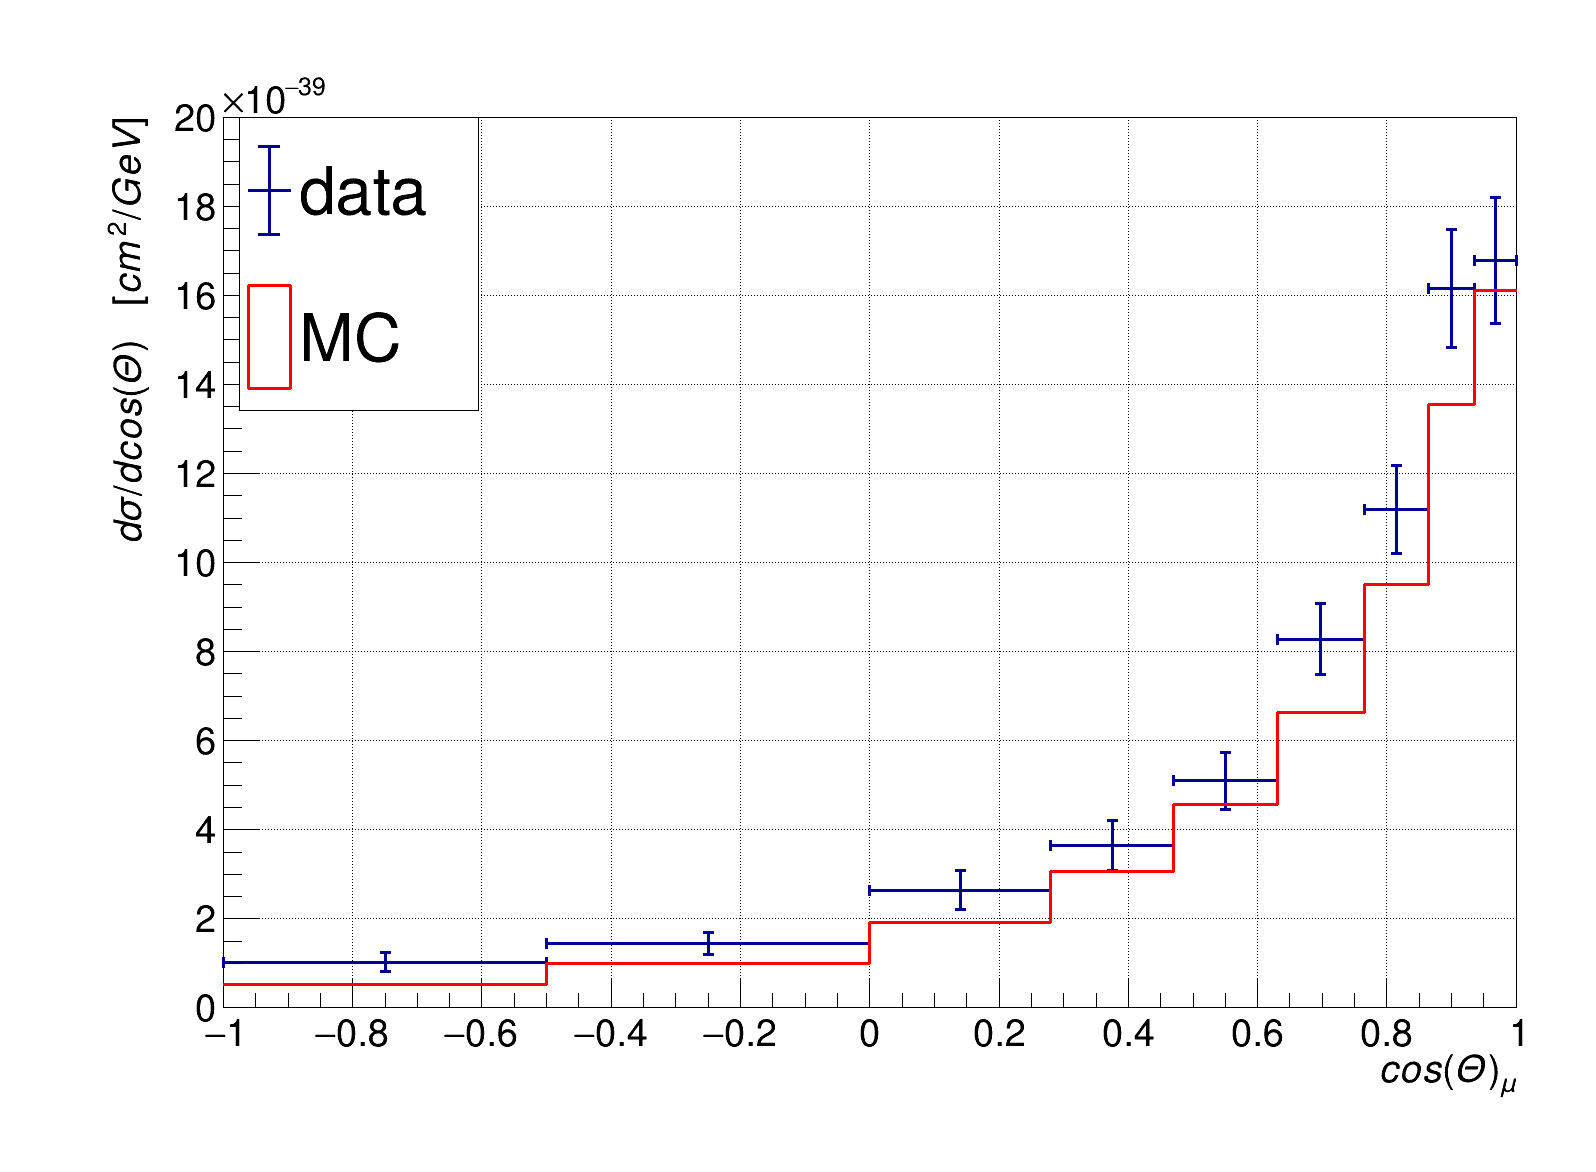

In [51]:
#legend = ROOT.TLegend(0.6,0.65,0.9,0.9) # rigth
legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # left
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetXTitle("cos(\Theta)_{\mu}")
h_data.SetYTitle("d\sigma / d cos(\Theta) \t [cm^2/GeV]")
h_data.SetLineWidth(3)
h_data.SetMaximum(20e-39)
h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(3)
h_overlay_sig.Draw('hist same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_corr_theta.png")
c1.SaveAs(outputdir_root + "h_xsec_corr_theta.root")
c1.SaveAs(outputdir_pdf + "h_xsec_corr_theta.pdf")

h_data.Write("h_xsec_data_theta")
h_overlay_sig.Write("h_xsec_MC_theta")

In [52]:
RootFile.Close()